TensorFlow Sun397 Image Classification Dataset
https://www.tensorflow.org/datasets/catalog/sun397

# Data

In [1]:
import shutil

#shutil.rmtree('/content/train')
#shutil.rmtree('/content/val')
#shutil.rmtree('/content/passports_test')
#shutil.rmtree('/content/train/class2/kak-vzyat-denezhniy-kredit-svyaznoy-magazin.jpg')


In [2]:
try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

from pathlib import Path
if IN_COLAB:
    google.colab.drive.mount("/content/drive")
    
    # Change this if you created the shortcut in a different location
    AUX_DATA_ROOT = Path("/content/drive/My Drive/Work/Data")
    
    assert AUX_DATA_ROOT.is_dir(), "Have you forgot to 'Add a shortcut to Drive'?"
    
    import sys
    sys.path.append(str(AUX_DATA_ROOT))
else:
    AUX_DATA_ROOT = Path(".")

Mounted at /content/drive


In [ ]:
AUX_DATA_ROOT

PosixPath('/content/drive/My Drive/Work/Data')

In [ ]:
if not Path("data_sets/test/class2").is_file():
    import zipfile
    with zipfile.ZipFile(AUX_DATA_ROOT / 'output.zip', 'r') as archive:
        archive.extractall()

In [ ]:
if not Path("data_sets/test/class2").is_file():
    import zipfile
    with zipfile.ZipFile(AUX_DATA_ROOT / 'passports_test.zip', 'r') as archive:
        archive.extractall()

# Passports vs Voennik

In [ ]:

if not Path("passp_voen/test/class2").is_file():
    import zipfile
    with zipfile.ZipFile(AUX_DATA_ROOT / 'passp_voen.zip', 'r') as archive:
        archive.extractall()

### Transforms

#### Calculate mean and stddev of dataset

In [ ]:
from PIL import ImageFile
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torch
from tqdm import tqdm
import torchvision
import os


In [ ]:

CALC_METRICS=False
if CALC_METRICS==True:
      ImageFile.LOAD_TRUNCATED_IMAGES = True

      transform_tr_normalization=transforms.Compose([transforms.Resize((200,200)),transforms.ToTensor()])
      tr_normalization=ImageFolder('/content/passp_voen/train',transform=transform_tr_normalization)
      image_loader=DataLoader(tr_normalization, batch_size= 1, shuffle= False,num_workers = 1,pin_memory= True)
      def batch_mean_and_sd(loader):
          cnt = 0
          fst_moment = torch.empty(3)
          snd_moment = torch.empty(3)

          for images, _ in tqdm(loader):
              b, c, h, w = images.shape
              nb_pixels = b * h * w
              sum_ = torch.sum(images, dim=[0, 2, 3])
              sum_of_square = torch.sum(images ** 2,
                                        dim=[0, 2, 3])
              fst_moment = (cnt * fst_moment + sum_) / (cnt + nb_pixels)
              snd_moment = (cnt * snd_moment + sum_of_square) / (cnt + nb_pixels)
              cnt += nb_pixels

          mean, std = fst_moment, torch.sqrt(snd_moment - fst_moment ** 2)        
          return mean,std
      mean,std=batch_mean_and_sd(image_loader)
      print(mean,std)

In [ ]:
ImageFile.LOAD_TRUNCATED_IMAGES = True
transform_tr1 = transforms.Compose([transforms.RandomHorizontalFlip(),transforms.Resize((224,224)),
                            transforms.CenterCrop((150,150)),
                            transforms.Resize((224,224)),
                            transforms.ToTensor(),
                            transforms.Normalize(mean=[0.6007, 0.5740, 0.5509]
                                                 ,std=[0.2879, 0.2793, 0.3010])])

transform_tr2 = transforms.Compose([transforms.Resize((224,224)),torchvision.transforms.RandomRotation(10),
                                  torchvision.transforms.RandomHorizontalFlip(),
                                  torchvision.transforms.RandomVerticalFlip(),
                                   torchvision.transforms.GaussianBlur(5, sigma=(0.1, 2.0)),
                                   transforms.ToTensor(),
                                   transforms.Normalize(mean=[0.6007, 0.5740, 0.5509]
                                                 ,std=[0.2879, 0.2793, 0.3010])])

transform_val = transforms.Compose([transforms.ToTensor(),
                                            transforms.Normalize(mean=[0.6007, 0.5740, 0.5509]
                                                 ,std=[0.2879, 0.2793, 0.3010])])
transform_test = transforms.Compose([transforms.ToTensor(),
                                            transforms.Normalize(mean=[0.6007, 0.5740, 0.5509]
                                                 ,std=[0.2879, 0.2793, 0.3010])])
#transforms.Resize((224,200)),transforms.ToTensor(),

In [ ]:
transform_tr1_voen = transforms.Compose([transforms.RandomHorizontalFlip(),transforms.Resize((224,224)),
                            transforms.CenterCrop((150,150)),
                            transforms.Resize((224,224)),
                            transforms.ToTensor(),
                            transforms.Normalize(mean=[0.7202, 0.6883, 0.6804]
                                                 ,std=[0.2256, 0.2295, 0.2392])])

transform_tr2_voen = transforms.Compose([transforms.Resize((224,224)),torchvision.transforms.RandomRotation(10),
                                  torchvision.transforms.RandomHorizontalFlip(),
                                  torchvision.transforms.RandomVerticalFlip(),
                                   torchvision.transforms.GaussianBlur(5, sigma=(0.1, 2.0)),
                                   transforms.ToTensor(),
                                   transforms.Normalize(mean=[0.7202, 0.6883, 0.6804]
                                                 ,std=[0.2256, 0.2295, 0.2392])])

transform_val_voen = transforms.Compose([transforms.ToTensor(),
                                            transforms.Normalize(mean=[0.7202, 0.6883, 0.6804]
                                                 ,std=[0.2256, 0.2295, 0.2392])])
transform_test_voen = transforms.Compose([transforms.ToTensor(),
                                            transforms.Normalize(mean=[0.7202, 0.6883, 0.6804]
                                                 ,std=[0.2256, 0.2295, 0.2392])])

#### Passport vs ALL

In [ ]:
train1 = ImageFolder('/content/output/train',transform=transform_tr1)
train2 = ImageFolder('/content/output/train',transform=transform_tr2)

val = ImageFolder('/content/output/val',transform=transform_val)
test = ImageFolder('/content/passports_test',transform=transform_test)



#### Passport vs Voennik

In [ ]:
train1_voen = ImageFolder('/content/passp_voen/train',transform=transform_tr1_voen)
train2_voen = ImageFolder('/content/passp_voen/train',transform=transform_tr2_voen)

val_voen = ImageFolder('/content/passp_voen/val',transform=transform_val_voen)

### Dataloaders
#### Passport vs ALL

In [ ]:
train_sets = [train1,train2]
train_dataset = torch.utils.data.ConcatDataset(train_sets)

train_loader=torch.utils.data.DataLoader(train_dataset, batch_size=64, 
                              shuffle=True, drop_last=False,num_workers=1)


val_loader=torch.utils.data.DataLoader(val, batch_size=1, 
                              shuffle=False, drop_last=False,num_workers=1)


test_loader=torch.utils.data.DataLoader(test, batch_size=1, 
                              shuffle=False, drop_last=False,num_workers=1)

dataloaders={'train':train_loader,'val':val_loader}

In [ ]:
len(test_loader)

324

#### Passport vs Voennik

In [ ]:
train_sets_voen = [train1_voen,train2_voen]
train_dataset_voen = torch.utils.data.ConcatDataset(train_sets_voen)

train_loader_voen=torch.utils.data.DataLoader(train_dataset_voen, batch_size=64, 
                              shuffle=True, drop_last=False,num_workers=1)


val_loader_voen=torch.utils.data.DataLoader(val_voen, batch_size=1, 
                              shuffle=False, drop_last=False,num_workers=1)

dataloaders_voen={'train':train_loader_voen,'val':val_loader_voen}

In [ ]:
len(train_loader_voen)

50

In [ ]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
def show_images(images, nmax=64):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid((images.detach()[:nmax]), nrow=8).permute(1, 2, 0))
def show_batch(dl, nmax=64):
    for images in dl:
        show_images(images, nmax)
        break

In [ ]:
next(iter(train_loader_voen))[0].shape

torch.Size([64, 3, 224, 224])

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


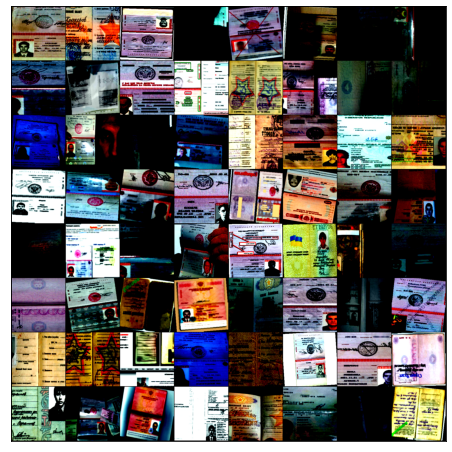

In [ ]:
show_batch(next(iter(train_loader_voen)))

# Device

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

# Model

In [ ]:
#Imports 
from torchvision import datasets, models, transforms
import torch.nn as nn

### Define Finetuning state

In [ ]:
def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False

In [ ]:
# choose from the zoo of models
def initialize_model(model_name, num_classes, feature_extract,input_size,use_pretrained=True):

    model_ft = None
    input_size =input_size

    if model_name == "resnet":
        """ Resnet18
        """
        model_ft = models.resnet18(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.fc.in_features
        model_ft.fc = nn.Linear(num_ftrs, num_classes)
        input_size = 224
    elif model_name == "resnet50":
        """ Resnet50
        """
        model_ft = models.resnet50(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.fc.in_features
        model_ft.fc = nn.Linear(num_ftrs, num_classes)
        input_size = 224
    elif model_name == "resnet152":
        """ Resnet152
        """
        model_ft = models.resnet152(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.fc.in_features
        model_ft.fc = nn.Linear(num_ftrs, num_classes)
        input_size = 224

    elif model_name == "alexnet":
        """ Alexnet
        """
        model_ft = models.alexnet(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.classifier[6].in_features
        model_ft.classifier[6] = nn.Linear(num_ftrs,num_classes)
        input_size = 224

    elif model_name == "vgg":
        """ VGG11_bn
        """
        model_ft = models.vgg11_bn(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.classifier[6].in_features
        model_ft.classifier[6] = nn.Linear(num_ftrs,num_classes)
        input_size = 224

    elif model_name == "squeezenet":
        """ Squeezenet
        """
        model_ft = models.squeezenet1_0(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        model_ft.classifier[1] = nn.Conv2d(512, num_classes, kernel_size=(1,1), stride=(1,1))
        model_ft.num_classes = num_classes
        input_size = 224

    elif model_name == "densenet":
        model_ft = models.densenet161(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.classifier.in_features
        model_ft.classifier = nn.Linear(num_ftrs, num_classes)
        input_size = 224

    elif model_name == "inception":
        """ Inception v3
        Be careful, expects (299,299) sized images and has auxiliary output
        """
        model_ft = models.inception_v3(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        # Handle the auxilary net
        num_ftrs = model_ft.AuxLogits.fc.in_features
        model_ft.AuxLogits.fc = nn.Linear(num_ftrs, num_classes)
        # Handle the primary net
        num_ftrs = model_ft.fc.in_features
        model_ft.fc = nn.Linear(num_ftrs,num_classes)
        input_size = 299

    else:
        print("Invalid model name, exiting...")
        exit()

    return model_ft, input_size

### Change number of classes

In [ ]:
torch.cuda.empty_cache()

In [ ]:
num_classes=2

feature_extract = True #When False, we finetune the whole model,when True we only update the reshaped layer params
input_size=224
model,_=initialize_model('densenet', num_classes, feature_extract,input_size,use_pretrained=True)
model.to(device)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

# Optimizer

In [ ]:
optimizer=torch.optim.RAdam(model.parameters(),
                            lr=0.001,
                            betas=(0.9,0.999),
                            eps=1e-08,
                            weight_decay=0.0001)

# Scheduler

In [ ]:
scheduler=torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.3)

# Training and Validation functions


In [ ]:
def validate(dataloader, model):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.eval()
    criterion = torch.nn.CrossEntropyLoss()
    loss_i = 0.0
    acc_i = 0
    y_pred_list=[]
    y_true_list=[]
    with torch.no_grad():
        for X, Y in tqdm(dataloader):
            X_device=X.to(device)
            Y_device=Y.to(device)
                  
            prediction=model(X_device)
          
            _, preds = torch.max(prediction, 1)

            y_pred_list.append(preds.detach().cpu().numpy()[0])
            y_true_list.append(Y_device.detach().cpu().numpy()[0])

            loss_func=criterion(prediction,Y_device)

            loss_i += loss_func.item() * X_device.size(0)
            acc_i += torch.sum(preds == Y_device.data)

    loss=loss_i / len(dataloader.dataset)
    accuracy = acc_i.double()*100 / len(dataloader.dataset)
    
    return accuracy.detach().cpu().numpy(),loss,y_pred_list,y_true_list

In [ ]:
def train_model(train_dataloader, val_dataloader, model, optimizer,scheduler,criterion,num_epochs):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    loss_i = 0.0
    acc_i = 0
    criterion = criterion
    scheduler=scheduler
    for epoch in range(num_epochs):
        model.train()
        for X, Y in tqdm(train_dataloader):
            model.zero_grad()
            X_device=X.to(device)
            Y_device=Y.to(device)
            
            prediction=model(X_device)
          
            _, preds = torch.max(prediction, 1)
            
            loss_func=criterion(prediction,Y_device)
            
            loss_func.backward()
          
            optimizer.step()
            
            loss_i += loss_func.item() * X_device.size(0)
            acc_i += torch.sum(preds == Y_device.data)
        
        epoch_tr_loss=loss_i / len(train_dataloader.dataset)
      
        epoch__tr_acc = acc_i.double() / len(train_dataloader.dataset)
        scheduler.step()
        
        
         
        epoch_val_acc,epoch_val_loss,y_pred_list,y_true_list=validate(val_dataloader, model,criterion)

        print(f'Training Loss: {epoch_tr_loss:.3f} Training Acc: {epoch__tr_acc:.3f}')
        print(f'Validation Loss: {epoch_val_loss:.3f} Validation Acc: {epoch_val_acc:.3f}')


In [ ]:
import time
import copy
def train_model(model, dataloaders, criterion, optimizer, num_epochs, scheduler,is_inception=False,):
    since = time.time()

    val_acc_history = []

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    scheduler=scheduler
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in tqdm(dataloaders[phase]):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    if is_inception and phase == 'train':
                        outputs, aux_outputs = model(inputs)
                        loss1 = criterion(outputs, labels)
                        loss2 = criterion(aux_outputs, labels)
                        loss = loss1 + 0.4*loss2
                    else:
                        outputs = model(inputs)
                        loss = criterion(outputs, labels)

                    _, preds = torch.max(outputs, 1)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)
            scheduler.step()
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
            if phase == 'val':
                val_acc_history.append(epoch_acc)

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, val_acc_history

# Model training
#### Model: Passport vs All

In [ ]:
train_model(model=model, dataloaders=dataloaders, criterion=nn.CrossEntropyLoss(), optimizer=optimizer, num_epochs=15, scheduler=scheduler,is_inception=False,)


Epoch 0/14
----------


  9%|▉         | 14/152 [00:48<07:30,  3.26s/it]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
 16%|█▋        | 25/152 [01:25<07:21,  3.48s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 152/152 [08:23<00:00,  3.31s/it]


train Loss: 0.4268 Acc: 0.7999


 28%|██▊       | 240/856 [01:06<01:03,  9.71it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
 71%|███████   | 609/856 [03:05<01:06,  3.74it/s]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 856/856 [04:18<00:00,  3.31it/s]


val Loss: 0.4391 Acc: 0.8820

Epoch 1/14
----------


  3%|▎         | 4/152 [00:15<09:56,  4.03s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
 26%|██▋       | 40/152 [02:15<06:20,  3.40s/it]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 152/152 [08:23<00:00,  3.31s/it]


train Loss: 0.2017 Acc: 0.9319


 71%|███████▏  | 610/856 [02:56<01:52,  2.19it/s]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))
 76%|███████▌  | 651/856 [03:10<01:18,  2.61it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 856/856 [04:16<00:00,  3.34it/s]


val Loss: 0.3561 Acc: 0.8995

Epoch 2/14
----------


  4%|▍         | 6/152 [00:20<08:02,  3.30s/it]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
 36%|███▌      | 55/152 [03:03<04:36,  2.85s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 152/152 [08:18<00:00,  3.28s/it]


train Loss: 0.1508 Acc: 0.9459


 13%|█▎        | 109/856 [00:41<09:41,  1.28it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
 55%|█████▍    | 467/856 [02:24<01:00,  6.47it/s]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 856/856 [04:15<00:00,  3.34it/s]


val Loss: 0.3134 Acc: 0.9042

Epoch 3/14
----------


 16%|█▌        | 24/152 [01:18<07:25,  3.48s/it]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
 51%|█████     | 77/152 [04:10<03:59,  3.19s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 152/152 [08:20<00:00,  3.29s/it]


train Loss: 0.1261 Acc: 0.9575


 81%|████████  | 693/856 [03:25<00:47,  3.43it/s]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))
 86%|████████▌ | 732/856 [03:31<00:15,  7.79it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 856/856 [04:12<00:00,  3.40it/s]


val Loss: 0.3056 Acc: 0.9136

Epoch 4/14
----------


 21%|██        | 32/152 [01:43<06:51,  3.43s/it]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
 32%|███▏      | 49/152 [02:41<06:04,  3.54s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 152/152 [08:27<00:00,  3.34s/it]


train Loss: 0.1149 Acc: 0.9638


  6%|▌         | 51/856 [00:16<02:40,  5.03it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
 41%|████      | 352/856 [01:43<02:12,  3.81it/s]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 856/856 [04:16<00:00,  3.34it/s]


val Loss: 0.2982 Acc: 0.9229

Epoch 5/14
----------


  7%|▋         | 11/152 [00:40<08:13,  3.50s/it]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
 18%|█▊        | 27/152 [01:34<06:52,  3.30s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 152/152 [08:24<00:00,  3.32s/it]


train Loss: 0.1149 Acc: 0.9635


 25%|██▌       | 215/856 [01:07<05:03,  2.11it/s]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))
 95%|█████████▍| 809/856 [03:59<00:15,  3.05it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 856/856 [04:14<00:00,  3.36it/s]


val Loss: 0.2928 Acc: 0.9147

Epoch 6/14
----------


  3%|▎         | 4/152 [00:13<07:52,  3.19s/it]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
  7%|▋         | 10/152 [00:34<08:51,  3.74s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 152/152 [08:18<00:00,  3.28s/it]


train Loss: 0.1099 Acc: 0.9636


  8%|▊         | 68/856 [00:23<03:43,  3.53it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
 41%|████▏     | 355/856 [01:42<02:33,  3.26it/s]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 856/856 [04:14<00:00,  3.37it/s]


val Loss: 0.2853 Acc: 0.9136

Epoch 7/14
----------


  8%|▊         | 12/152 [00:41<08:47,  3.77s/it]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
 56%|█████▌    | 85/152 [04:39<03:39,  3.28s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 152/152 [08:30<00:00,  3.36s/it]


train Loss: 0.1080 Acc: 0.9655


 30%|██▉       | 256/856 [01:13<04:55,  2.03it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
 44%|████▍     | 380/856 [01:56<03:57,  2.00it/s]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 856/856 [04:14<00:00,  3.36it/s]


val Loss: 0.2865 Acc: 0.9182

Epoch 8/14
----------


  9%|▊         | 13/152 [00:46<07:25,  3.21s/it]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
 77%|███████▋  | 117/152 [06:26<01:45,  3.01s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 152/152 [08:19<00:00,  3.29s/it]


train Loss: 0.1050 Acc: 0.9662


  2%|▏         | 16/856 [00:03<06:40,  2.10it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
 55%|█████▌    | 472/856 [02:17<02:14,  2.85it/s]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 856/856 [04:16<00:00,  3.33it/s]


val Loss: 0.2843 Acc: 0.9100

Epoch 9/14
----------


 12%|█▏        | 18/152 [00:57<07:01,  3.14s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
 28%|██▊       | 42/152 [02:16<05:55,  3.23s/it]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 152/152 [08:21<00:00,  3.30s/it]


train Loss: 0.1054 Acc: 0.9656


  4%|▎         | 32/856 [00:07<01:41,  8.14it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
 74%|███████▎  | 631/856 [03:11<00:42,  5.26it/s]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 856/856 [04:17<00:00,  3.33it/s]


val Loss: 0.2851 Acc: 0.9136

Epoch 10/14
----------


  0%|          | 0/152 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
 22%|██▏       | 33/152 [01:51<06:36,  3.33s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 152/152 [08:17<00:00,  3.27s/it]


train Loss: 0.1039 Acc: 0.9671


  8%|▊         | 72/856 [00:25<02:35,  5.05it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
 66%|██████▋   | 569/856 [02:45<00:59,  4.83it/s]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 856/856 [04:15<00:00,  3.35it/s]


val Loss: 0.2831 Acc: 0.9182

Epoch 11/14
----------


  3%|▎         | 4/152 [00:13<07:46,  3.15s/it]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
 59%|█████▊    | 89/152 [04:48<03:34,  3.41s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 152/152 [08:15<00:00,  3.26s/it]


train Loss: 0.1059 Acc: 0.9659


  5%|▌         | 46/856 [00:13<02:48,  4.81it/s]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))
  9%|▉         | 76/856 [00:21<02:22,  5.49it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 856/856 [04:15<00:00,  3.35it/s]


val Loss: 0.2855 Acc: 0.9217

Epoch 12/14
----------


 16%|█▋        | 25/152 [01:20<06:57,  3.29s/it]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
 43%|████▎     | 66/152 [03:31<04:46,  3.33s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 152/152 [08:13<00:00,  3.25s/it]


train Loss: 0.1051 Acc: 0.9648


 29%|██▉       | 248/856 [01:10<02:16,  4.45it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
 95%|█████████▌| 816/856 [04:03<00:06,  6.25it/s]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 856/856 [04:15<00:00,  3.35it/s]


val Loss: 0.2826 Acc: 0.9171

Epoch 13/14
----------


 16%|█▌        | 24/152 [01:28<07:31,  3.52s/it]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
 16%|█▋        | 25/152 [01:33<07:48,  3.69s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 152/152 [08:23<00:00,  3.31s/it]


train Loss: 0.1047 Acc: 0.9677


 22%|██▏       | 190/856 [01:05<07:10,  1.55it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
 31%|███▏      | 269/856 [01:30<03:40,  2.66it/s]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 856/856 [04:15<00:00,  3.36it/s]


val Loss: 0.2786 Acc: 0.9229

Epoch 14/14
----------


 14%|█▍        | 21/152 [01:11<07:40,  3.52s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
 14%|█▍        | 22/152 [01:16<08:01,  3.70s/it]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 152/152 [08:19<00:00,  3.29s/it]


train Loss: 0.1048 Acc: 0.9665


 48%|████▊     | 413/856 [01:52<02:15,  3.27it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
 81%|████████  | 693/856 [03:27<00:31,  5.12it/s]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 856/856 [04:17<00:00,  3.32it/s]


val Loss: 0.2855 Acc: 0.9171

Training complete in 189m 17s
Best val Acc: 0.922897


(DenseNet(
   (features): Sequential(
     (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
     (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (relu0): ReLU(inplace=True)
     (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
     (denseblock1): _DenseBlock(
       (denselayer1): _DenseLayer(
         (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
         (relu1): ReLU(inplace=True)
         (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
         (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
         (relu2): ReLU(inplace=True)
         (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
       )
       (denselayer2): _DenseLayer(
         (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=T

#### Model: Passport vs Voennik

In [ ]:
torch.cuda.empty_cache()
num_classes=2

feature_extract = True #When False, we finetune the whole model,when True we only update the reshaped layer params
input_size=224
model_voen,_=initialize_model('resnet152', num_classes, feature_extract,input_size,use_pretrained=True)
model_voen.to(device)

optimizer_voen=torch.optim.RAdam(model_voen.parameters(),
                            lr=0.001,
                            betas=(0.9,0.999),
                            eps=1e-08,
                            weight_decay=0.001)
scheduler_voen=torch.optim.lr_scheduler.StepLR(optimizer_voen, step_size=30, gamma=0.1)
train_model(model=model_voen, dataloaders=dataloaders_voen, criterion=nn.CrossEntropyLoss(), optimizer=optimizer_voen, num_epochs=100, scheduler=scheduler_voen,is_inception=False,)


Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth


  0%|          | 0.00/230M [00:00<?, ?B/s]

Epoch 0/99
----------


  4%|▍         | 2/50 [00:04<01:41,  2.12s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:33<00:00,  1.88s/it]


train Loss: 0.4591 Acc: 0.7916


 46%|████▌     | 169/369 [00:32<00:19, 10.44it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:18<00:00,  4.69it/s]


val Loss: 0.5214 Acc: 0.7805

Epoch 1/99
----------


 62%|██████▏   | 31/50 [00:58<00:35,  1.87s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.88s/it]


train Loss: 0.3041 Acc: 0.8639


 64%|██████▎   | 235/369 [00:44<00:13, 10.28it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:18<00:00,  4.70it/s]


val Loss: 0.4730 Acc: 0.8970

Epoch 2/99
----------


 28%|██▊       | 14/50 [00:28<01:06,  1.84s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:33<00:00,  1.88s/it]


train Loss: 0.2008 Acc: 0.9397


 75%|███████▌  | 277/369 [01:00<00:25,  3.59it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:17<00:00,  4.74it/s]


val Loss: 0.3836 Acc: 0.8699

Epoch 3/99
----------


 14%|█▍        | 7/50 [00:13<01:27,  2.03s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:33<00:00,  1.88s/it]


train Loss: 0.1583 Acc: 0.9530


 75%|███████▍  | 276/369 [00:55<00:11,  8.15it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:18<00:00,  4.72it/s]


val Loss: 0.3849 Acc: 0.9485

Epoch 4/99
----------


 18%|█▊        | 9/50 [00:18<01:22,  2.00s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.88s/it]


train Loss: 0.1368 Acc: 0.9594


 25%|██▍       | 91/369 [00:18<00:38,  7.15it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:18<00:00,  4.70it/s]


val Loss: 0.3282 Acc: 0.9241

Epoch 5/99
----------


 24%|██▍       | 12/50 [00:23<01:11,  1.88s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.88s/it]


train Loss: 0.1111 Acc: 0.9686


 63%|██████▎   | 233/369 [00:48<00:27,  4.92it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:17<00:00,  4.74it/s]


val Loss: 0.3080 Acc: 0.9322

Epoch 6/99
----------


  0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:35<00:00,  1.91s/it]


train Loss: 0.1010 Acc: 0.9683


 81%|████████▏ | 300/369 [01:04<00:36,  1.89it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:19<00:00,  4.66it/s]


val Loss: 0.2850 Acc: 0.9106

Epoch 7/99
----------


 26%|██▌       | 13/50 [00:27<01:14,  2.01s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:36<00:00,  1.93s/it]


train Loss: 0.0941 Acc: 0.9718


 75%|███████▍  | 276/369 [00:59<00:33,  2.74it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:18<00:00,  4.72it/s]


val Loss: 0.2696 Acc: 0.8889

Epoch 8/99
----------


 20%|██        | 10/50 [00:20<01:16,  1.91s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:35<00:00,  1.91s/it]


train Loss: 0.0908 Acc: 0.9673


 97%|█████████▋| 357/369 [01:17<00:04,  2.46it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:19<00:00,  4.63it/s]


val Loss: 0.2655 Acc: 0.8943

Epoch 9/99
----------


 86%|████████▌ | 43/50 [01:23<00:13,  1.97s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.90s/it]


train Loss: 0.0831 Acc: 0.9724


 84%|████████▍ | 311/369 [01:08<00:20,  2.87it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:19<00:00,  4.65it/s]


val Loss: 0.2474 Acc: 0.9106

Epoch 10/99
----------


 14%|█▍        | 7/50 [00:14<01:26,  2.00s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.90s/it]


train Loss: 0.0803 Acc: 0.9730


 50%|████▉     | 183/369 [00:38<00:32,  5.80it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:18<00:00,  4.68it/s]


val Loss: 0.2461 Acc: 0.8970

Epoch 11/99
----------


 68%|██████▊   | 34/50 [01:05<00:29,  1.82s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


train Loss: 0.0658 Acc: 0.9800


 83%|████████▎ | 307/369 [01:07<00:13,  4.66it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:19<00:00,  4.64it/s]


val Loss: 0.2369 Acc: 0.9350

Epoch 12/99
----------


 34%|███▍      | 17/50 [00:32<01:01,  1.87s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.90s/it]


train Loss: 0.0663 Acc: 0.9803


 56%|█████▌    | 205/369 [00:41<00:25,  6.39it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:18<00:00,  4.73it/s]


val Loss: 0.2314 Acc: 0.9160

Epoch 13/99
----------


 36%|███▌      | 18/50 [00:34<00:59,  1.85s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.90s/it]


train Loss: 0.0668 Acc: 0.9721


 73%|███████▎  | 269/369 [00:55<00:13,  7.44it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:19<00:00,  4.65it/s]


val Loss: 0.2246 Acc: 0.9295

Epoch 14/99
----------


 38%|███▊      | 19/50 [00:36<01:01,  1.97s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


train Loss: 0.0664 Acc: 0.9765


 15%|█▍        | 54/369 [00:10<00:28, 11.20it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:18<00:00,  4.67it/s]


val Loss: 0.2427 Acc: 0.9729

Epoch 15/99
----------


 48%|████▊     | 24/50 [00:46<00:49,  1.90s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


train Loss: 0.0629 Acc: 0.9778


 70%|██████▉   | 258/369 [01:00<00:32,  3.40it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:19<00:00,  4.66it/s]


val Loss: 0.2217 Acc: 0.9377

Epoch 16/99
----------


 62%|██████▏   | 31/50 [01:00<00:38,  2.03s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:33<00:00,  1.88s/it]


train Loss: 0.0612 Acc: 0.9778


 76%|███████▌  | 280/369 [01:02<00:21,  4.20it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:19<00:00,  4.66it/s]


val Loss: 0.2183 Acc: 0.9458

Epoch 17/99
----------


 12%|█▏        | 6/50 [00:11<01:19,  1.80s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:33<00:00,  1.88s/it]


train Loss: 0.0610 Acc: 0.9778


 76%|███████▌  | 280/369 [00:56<00:08, 10.23it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:18<00:00,  4.67it/s]


val Loss: 0.2216 Acc: 0.9350

Epoch 18/99
----------


 70%|███████   | 35/50 [01:06<00:29,  2.00s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.88s/it]


train Loss: 0.0554 Acc: 0.9800


  8%|▊         | 28/369 [00:07<01:20,  4.25it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:18<00:00,  4.70it/s]


val Loss: 0.2202 Acc: 0.9458

Epoch 19/99
----------


 50%|█████     | 25/50 [00:47<00:44,  1.76s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.88s/it]


train Loss: 0.0574 Acc: 0.9810


  2%|▏         | 7/369 [00:00<00:38,  9.35it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:18<00:00,  4.69it/s]


val Loss: 0.2231 Acc: 0.9539

Epoch 20/99
----------


 10%|█         | 5/50 [00:09<01:25,  1.91s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:33<00:00,  1.88s/it]


train Loss: 0.0558 Acc: 0.9829


 76%|███████▌  | 279/369 [01:00<00:24,  3.71it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:19<00:00,  4.64it/s]


val Loss: 0.2186 Acc: 0.9404

Epoch 21/99
----------


  0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:33<00:00,  1.88s/it]


train Loss: 0.0548 Acc: 0.9835


 67%|██████▋   | 249/369 [00:55<00:51,  2.34it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:19<00:00,  4.65it/s]


val Loss: 0.2245 Acc: 0.9539

Epoch 22/99
----------


 18%|█▊        | 9/50 [00:17<01:15,  1.84s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:33<00:00,  1.87s/it]


train Loss: 0.0561 Acc: 0.9800


 50%|████▉     | 183/369 [00:37<00:32,  5.74it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:19<00:00,  4.65it/s]


val Loss: 0.2141 Acc: 0.9485

Epoch 23/99
----------


 84%|████████▍ | 42/50 [01:21<00:15,  1.99s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


train Loss: 0.0554 Acc: 0.9803


 88%|████████▊ | 326/369 [01:13<00:15,  2.86it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:18<00:00,  4.67it/s]


val Loss: 0.2157 Acc: 0.9485

Epoch 24/99
----------


 76%|███████▌  | 38/50 [01:13<00:22,  1.87s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


train Loss: 0.0586 Acc: 0.9794


 76%|███████▌  | 279/369 [01:00<00:12,  7.08it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:18<00:00,  4.71it/s]


val Loss: 0.2175 Acc: 0.9377

Epoch 25/99
----------


 18%|█▊        | 9/50 [00:18<01:21,  1.98s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


train Loss: 0.0531 Acc: 0.9826


 85%|████████▍ | 312/369 [01:05<00:07,  7.91it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:19<00:00,  4.64it/s]


val Loss: 0.2205 Acc: 0.9431

Epoch 26/99
----------


  0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


train Loss: 0.0554 Acc: 0.9826


 28%|██▊       | 105/369 [00:24<01:15,  3.52it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:18<00:00,  4.71it/s]


val Loss: 0.2144 Acc: 0.9377

Epoch 27/99
----------


 14%|█▍        | 7/50 [00:15<01:34,  2.21s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


train Loss: 0.0553 Acc: 0.9819


 90%|████████▉ | 332/369 [01:12<00:04,  7.41it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:19<00:00,  4.66it/s]


val Loss: 0.2153 Acc: 0.9377

Epoch 28/99
----------


 22%|██▏       | 11/50 [00:20<01:10,  1.80s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.90s/it]


train Loss: 0.0572 Acc: 0.9797


  5%|▌         | 20/369 [00:03<01:19,  4.36it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:18<00:00,  4.68it/s]


val Loss: 0.2140 Acc: 0.9187

Epoch 29/99
----------


  4%|▍         | 2/50 [00:04<01:53,  2.37s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


train Loss: 0.0529 Acc: 0.9826


  4%|▍         | 15/369 [00:03<01:02,  5.69it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:18<00:00,  4.71it/s]


val Loss: 0.2094 Acc: 0.9241

Epoch 30/99
----------


 24%|██▍       | 12/50 [00:24<01:15,  2.00s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


train Loss: 0.0507 Acc: 0.9841


 38%|███▊      | 141/369 [00:27<00:33,  6.90it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:18<00:00,  4.72it/s]


val Loss: 0.2170 Acc: 0.9322

Epoch 31/99
----------


 68%|██████▊   | 34/50 [01:05<00:30,  1.89s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


train Loss: 0.0543 Acc: 0.9810


 59%|█████▊    | 216/369 [00:49<00:32,  4.65it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:18<00:00,  4.70it/s]


val Loss: 0.2137 Acc: 0.9350

Epoch 32/99
----------


 46%|████▌     | 23/50 [00:44<00:54,  2.02s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


train Loss: 0.0494 Acc: 0.9857


 59%|█████▉    | 219/369 [00:46<00:16,  8.99it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:19<00:00,  4.67it/s]


val Loss: 0.2138 Acc: 0.9377

Epoch 33/99
----------


  2%|▏         | 1/50 [00:02<01:52,  2.30s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


train Loss: 0.0540 Acc: 0.9816


  3%|▎         | 11/369 [00:01<00:49,  7.25it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:18<00:00,  4.68it/s]


val Loss: 0.2133 Acc: 0.9350

Epoch 34/99
----------


 36%|███▌      | 18/50 [00:35<00:57,  1.80s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.90s/it]


train Loss: 0.0543 Acc: 0.9803


 22%|██▏       | 83/369 [00:19<01:19,  3.58it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:19<00:00,  4.66it/s]


val Loss: 0.2127 Acc: 0.9404

Epoch 35/99
----------


  6%|▌         | 3/50 [00:06<01:36,  2.05s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


train Loss: 0.0581 Acc: 0.9787


 69%|██████▉   | 254/369 [00:58<00:21,  5.45it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:18<00:00,  4.69it/s]


val Loss: 0.2167 Acc: 0.9431

Epoch 36/99
----------


 24%|██▍       | 12/50 [00:23<01:10,  1.86s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


train Loss: 0.0552 Acc: 0.9791


 65%|██████▍   | 239/369 [00:53<00:26,  4.84it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:19<00:00,  4.65it/s]


val Loss: 0.2178 Acc: 0.9295

Epoch 37/99
----------


 42%|████▏     | 21/50 [00:42<01:00,  2.09s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


train Loss: 0.0525 Acc: 0.9813


 60%|██████    | 222/369 [00:51<00:51,  2.87it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:19<00:00,  4.64it/s]


val Loss: 0.2134 Acc: 0.9431

Epoch 38/99
----------


 80%|████████  | 40/50 [01:15<00:19,  1.95s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:33<00:00,  1.88s/it]


train Loss: 0.0556 Acc: 0.9829


 25%|██▍       | 91/369 [00:20<00:32,  8.65it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:18<00:00,  4.71it/s]


val Loss: 0.2135 Acc: 0.9431

Epoch 39/99
----------


  2%|▏         | 1/50 [00:02<02:04,  2.54s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


train Loss: 0.0542 Acc: 0.9816


 73%|███████▎  | 271/369 [00:59<00:27,  3.60it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:18<00:00,  4.70it/s]


val Loss: 0.2129 Acc: 0.9431

Epoch 40/99
----------


 12%|█▏        | 6/50 [00:11<01:19,  1.80s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.88s/it]


train Loss: 0.0568 Acc: 0.9816


 81%|████████  | 298/369 [01:04<00:22,  3.12it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:19<00:00,  4.67it/s]


val Loss: 0.2141 Acc: 0.9322

Epoch 41/99
----------


 48%|████▊     | 24/50 [00:45<00:49,  1.90s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.88s/it]


train Loss: 0.0505 Acc: 0.9829


 24%|██▍       | 88/369 [00:20<00:59,  4.76it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:19<00:00,  4.63it/s]


val Loss: 0.2131 Acc: 0.9458

Epoch 42/99
----------


  8%|▊         | 4/50 [00:07<01:22,  1.79s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.90s/it]


train Loss: 0.0552 Acc: 0.9791


 99%|█████████▊| 364/369 [01:17<00:00,  8.51it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:18<00:00,  4.69it/s]


val Loss: 0.2114 Acc: 0.9431

Epoch 43/99
----------


 62%|██████▏   | 31/50 [00:59<00:36,  1.91s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


train Loss: 0.0511 Acc: 0.9832


 58%|█████▊    | 215/369 [00:45<00:14, 10.40it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:19<00:00,  4.65it/s]


val Loss: 0.2142 Acc: 0.9431

Epoch 44/99
----------


 82%|████████▏ | 41/50 [01:18<00:19,  2.13s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


train Loss: 0.0538 Acc: 0.9816


 40%|████      | 149/369 [00:32<00:29,  7.52it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:19<00:00,  4.66it/s]


val Loss: 0.2143 Acc: 0.9350

Epoch 45/99
----------


  6%|▌         | 3/50 [00:06<01:34,  2.01s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


train Loss: 0.0563 Acc: 0.9800


 66%|██████▌   | 244/369 [00:51<00:15,  7.97it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:18<00:00,  4.68it/s]


val Loss: 0.2138 Acc: 0.9241

Epoch 46/99
----------


 88%|████████▊ | 44/50 [01:26<00:10,  1.77s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:35<00:00,  1.91s/it]


train Loss: 0.0547 Acc: 0.9810


 72%|███████▏  | 267/369 [00:57<00:16,  6.36it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:18<00:00,  4.71it/s]


val Loss: 0.2117 Acc: 0.9295

Epoch 47/99
----------


  4%|▍         | 2/50 [00:04<01:45,  2.20s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


train Loss: 0.0521 Acc: 0.9819


 54%|█████▍    | 200/369 [00:43<00:20,  8.39it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:19<00:00,  4.67it/s]


val Loss: 0.2133 Acc: 0.9322

Epoch 48/99
----------


  4%|▍         | 2/50 [00:04<01:48,  2.25s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


train Loss: 0.0548 Acc: 0.9794


 70%|██████▉   | 257/369 [00:48<00:19,  5.87it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:19<00:00,  4.67it/s]


val Loss: 0.2147 Acc: 0.9322

Epoch 49/99
----------


 76%|███████▌  | 38/50 [01:13<00:20,  1.71s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


train Loss: 0.0516 Acc: 0.9838


 56%|█████▌    | 206/369 [00:41<00:17,  9.53it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:19<00:00,  4.66it/s]


val Loss: 0.2146 Acc: 0.9350

Epoch 50/99
----------


 26%|██▌       | 13/50 [00:25<01:13,  1.98s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


train Loss: 0.0528 Acc: 0.9835


 64%|██████▍   | 238/369 [00:52<00:21,  6.03it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:18<00:00,  4.67it/s]


val Loss: 0.2139 Acc: 0.9404

Epoch 51/99
----------


 42%|████▏     | 21/50 [00:41<00:55,  1.90s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


train Loss: 0.0568 Acc: 0.9784


 20%|█▉        | 73/369 [00:14<00:38,  7.60it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:18<00:00,  4.68it/s]


val Loss: 0.2154 Acc: 0.9350

Epoch 52/99
----------


  6%|▌         | 3/50 [00:06<01:36,  2.05s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


train Loss: 0.0539 Acc: 0.9832


 64%|██████▍   | 236/369 [00:55<00:54,  2.43it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:19<00:00,  4.66it/s]


val Loss: 0.2126 Acc: 0.9295

Epoch 53/99
----------


  8%|▊         | 4/50 [00:07<01:23,  1.81s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.88s/it]


train Loss: 0.0532 Acc: 0.9829


 88%|████████▊ | 323/369 [01:07<00:06,  7.51it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:18<00:00,  4.67it/s]


val Loss: 0.2151 Acc: 0.9322

Epoch 54/99
----------


 42%|████▏     | 21/50 [00:41<00:54,  1.90s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


train Loss: 0.0501 Acc: 0.9841


 89%|████████▉ | 328/369 [01:09<00:07,  5.66it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:18<00:00,  4.67it/s]


val Loss: 0.2141 Acc: 0.9377

Epoch 55/99
----------


 26%|██▌       | 13/50 [00:25<01:08,  1.84s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


train Loss: 0.0500 Acc: 0.9848


 58%|█████▊    | 215/369 [00:40<00:23,  6.68it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:19<00:00,  4.63it/s]


val Loss: 0.2147 Acc: 0.9268

Epoch 56/99
----------


  0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:33<00:00,  1.88s/it]


train Loss: 0.0544 Acc: 0.9822


  0%|          | 0/369 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:19<00:00,  4.67it/s]


val Loss: 0.2103 Acc: 0.9350

Epoch 57/99
----------


  8%|▊         | 4/50 [00:08<01:32,  2.02s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


train Loss: 0.0553 Acc: 0.9797


 56%|█████▋    | 208/369 [00:48<00:36,  4.44it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:19<00:00,  4.63it/s]


val Loss: 0.2110 Acc: 0.9431

Epoch 58/99
----------


  6%|▌         | 3/50 [00:05<01:23,  1.78s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


train Loss: 0.0530 Acc: 0.9829


  7%|▋         | 24/369 [00:05<01:55,  3.00it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:19<00:00,  4.64it/s]


val Loss: 0.2131 Acc: 0.9404

Epoch 59/99
----------


  2%|▏         | 1/50 [00:02<02:02,  2.50s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


train Loss: 0.0540 Acc: 0.9797


 21%|██        | 78/369 [00:16<01:07,  4.30it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:18<00:00,  4.70it/s]


val Loss: 0.2127 Acc: 0.9377

Epoch 60/99
----------


 64%|██████▍   | 32/50 [01:00<00:37,  2.06s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


train Loss: 0.0528 Acc: 0.9822


 19%|█▉        | 71/369 [00:17<01:08,  4.34it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:18<00:00,  4.67it/s]


val Loss: 0.2071 Acc: 0.9431

Epoch 61/99
----------


 28%|██▊       | 14/50 [00:27<01:16,  2.12s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


train Loss: 0.0500 Acc: 0.9835


 18%|█▊        | 65/369 [00:15<00:36,  8.29it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:18<00:00,  4.72it/s]


val Loss: 0.2134 Acc: 0.9431

Epoch 62/99
----------


 16%|█▌        | 8/50 [00:15<01:21,  1.94s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


train Loss: 0.0501 Acc: 0.9826


  9%|▉         | 33/369 [00:07<00:42,  7.88it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:18<00:00,  4.71it/s]


val Loss: 0.2090 Acc: 0.9350

Epoch 63/99
----------


 68%|██████▊   | 34/50 [01:06<00:28,  1.78s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


train Loss: 0.0570 Acc: 0.9819


 62%|██████▏   | 227/369 [00:49<00:28,  5.07it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:19<00:00,  4.63it/s]


val Loss: 0.2128 Acc: 0.9404

Epoch 64/99
----------


 14%|█▍        | 7/50 [00:13<01:18,  1.83s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


train Loss: 0.0525 Acc: 0.9822


  1%|          | 3/369 [00:00<00:32, 11.20it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:19<00:00,  4.67it/s]


val Loss: 0.2168 Acc: 0.9322

Epoch 65/99
----------


 10%|█         | 5/50 [00:09<01:32,  2.06s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


train Loss: 0.0537 Acc: 0.9826


 20%|█▉        | 72/369 [00:11<00:31,  9.39it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:19<00:00,  4.66it/s]


val Loss: 0.2167 Acc: 0.9404

Epoch 66/99
----------


 34%|███▍      | 17/50 [00:33<01:04,  1.95s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.90s/it]


train Loss: 0.0538 Acc: 0.9832


 37%|███▋      | 135/369 [00:25<00:26,  8.90it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:19<00:00,  4.64it/s]


val Loss: 0.2170 Acc: 0.9350

Epoch 67/99
----------


  2%|▏         | 1/50 [00:02<01:45,  2.15s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


train Loss: 0.0506 Acc: 0.9829


 24%|██▎       | 87/369 [00:19<02:25,  1.94it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:18<00:00,  4.68it/s]


val Loss: 0.2122 Acc: 0.9431

Epoch 68/99
----------


 24%|██▍       | 12/50 [00:23<01:09,  1.84s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.90s/it]


train Loss: 0.0592 Acc: 0.9819


 51%|█████     | 188/369 [00:43<00:41,  4.40it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:19<00:00,  4.64it/s]


val Loss: 0.2129 Acc: 0.9322

Epoch 69/99
----------


  4%|▍         | 2/50 [00:04<01:38,  2.05s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


train Loss: 0.0506 Acc: 0.9835


 82%|████████▏ | 301/369 [01:05<00:07,  9.28it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:19<00:00,  4.64it/s]


val Loss: 0.2104 Acc: 0.9458

Epoch 70/99
----------


 40%|████      | 20/50 [00:39<01:01,  2.06s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


train Loss: 0.0493 Acc: 0.9864


  2%|▏         | 9/369 [00:02<02:00,  2.99it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:19<00:00,  4.62it/s]


val Loss: 0.2156 Acc: 0.9485

Epoch 71/99
----------


 14%|█▍        | 7/50 [00:14<01:26,  2.00s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


train Loss: 0.0515 Acc: 0.9826


 83%|████████▎ | 306/369 [01:07<00:18,  3.47it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:19<00:00,  4.63it/s]


val Loss: 0.2143 Acc: 0.9322

Epoch 72/99
----------


 34%|███▍      | 17/50 [00:33<01:01,  1.87s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


train Loss: 0.0528 Acc: 0.9810


 63%|██████▎   | 233/369 [00:44<00:19,  6.88it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:20<00:00,  4.61it/s]


val Loss: 0.2120 Acc: 0.9431

Epoch 73/99
----------


 38%|███▊      | 19/50 [00:37<00:59,  1.91s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


train Loss: 0.0526 Acc: 0.9826


 46%|████▌     | 169/369 [00:41<00:35,  5.71it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:19<00:00,  4.66it/s]


val Loss: 0.2126 Acc: 0.9322

Epoch 74/99
----------


 72%|███████▏  | 36/50 [01:08<00:27,  1.94s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.88s/it]


train Loss: 0.0548 Acc: 0.9806


 76%|███████▋  | 282/369 [01:03<00:17,  4.90it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:19<00:00,  4.64it/s]


val Loss: 0.2128 Acc: 0.9431

Epoch 75/99
----------


 54%|█████▍    | 27/50 [00:52<00:45,  1.99s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


train Loss: 0.0548 Acc: 0.9816


 72%|███████▏  | 266/369 [00:55<00:28,  3.67it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:19<00:00,  4.63it/s]


val Loss: 0.2123 Acc: 0.9322

Epoch 76/99
----------


 40%|████      | 20/50 [00:38<00:51,  1.73s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:33<00:00,  1.88s/it]


train Loss: 0.0563 Acc: 0.9832


 88%|████████▊ | 323/369 [01:11<00:16,  2.82it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:18<00:00,  4.69it/s]


val Loss: 0.2146 Acc: 0.9458

Epoch 77/99
----------


 40%|████      | 20/50 [00:38<00:51,  1.70s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.88s/it]


train Loss: 0.0516 Acc: 0.9813


 64%|██████▍   | 237/369 [00:54<00:14,  8.98it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:18<00:00,  4.68it/s]


val Loss: 0.2145 Acc: 0.9322

Epoch 78/99
----------


 32%|███▏      | 16/50 [00:31<01:08,  2.01s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


train Loss: 0.0511 Acc: 0.9835


 46%|████▌     | 169/369 [00:42<00:57,  3.46it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:18<00:00,  4.68it/s]


val Loss: 0.2115 Acc: 0.9377

Epoch 79/99
----------


 72%|███████▏  | 36/50 [01:08<00:25,  1.82s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


train Loss: 0.0512 Acc: 0.9848


 68%|██████▊   | 252/369 [00:57<00:15,  7.35it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:18<00:00,  4.69it/s]


val Loss: 0.2129 Acc: 0.9431

Epoch 80/99
----------


 10%|█         | 5/50 [00:10<01:31,  2.04s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


train Loss: 0.0529 Acc: 0.9832


 36%|███▌      | 133/369 [00:29<00:39,  6.01it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:18<00:00,  4.67it/s]


val Loss: 0.2114 Acc: 0.9350

Epoch 81/99
----------


 32%|███▏      | 16/50 [00:30<01:06,  1.95s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


train Loss: 0.0565 Acc: 0.9781


 35%|███▌      | 130/369 [00:29<01:00,  3.93it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:19<00:00,  4.62it/s]


val Loss: 0.2152 Acc: 0.9268

Epoch 82/99
----------


 72%|███████▏  | 36/50 [01:09<00:28,  2.06s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.88s/it]


train Loss: 0.0506 Acc: 0.9810


 11%|█         | 40/369 [00:06<01:27,  3.76it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:19<00:00,  4.63it/s]


val Loss: 0.2128 Acc: 0.9485

Epoch 83/99
----------


  8%|▊         | 4/50 [00:07<01:27,  1.91s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


train Loss: 0.0531 Acc: 0.9826


 66%|██████▋   | 245/369 [00:52<00:10, 11.51it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:19<00:00,  4.64it/s]


val Loss: 0.2144 Acc: 0.9377

Epoch 84/99
----------


 84%|████████▍ | 42/50 [01:20<00:15,  1.94s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


train Loss: 0.0564 Acc: 0.9791


  0%|          | 0/369 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:18<00:00,  4.70it/s]


val Loss: 0.2100 Acc: 0.9377

Epoch 85/99
----------


  6%|▌         | 3/50 [00:06<01:37,  2.08s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


train Loss: 0.0477 Acc: 0.9848


 35%|███▍      | 128/369 [00:26<00:47,  5.08it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:18<00:00,  4.68it/s]


val Loss: 0.2127 Acc: 0.9322

Epoch 86/99
----------


 44%|████▍     | 22/50 [00:42<00:59,  2.12s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:33<00:00,  1.88s/it]


train Loss: 0.0509 Acc: 0.9819


 70%|███████   | 260/369 [00:55<00:16,  6.43it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:19<00:00,  4.66it/s]


val Loss: 0.2122 Acc: 0.9322

Epoch 87/99
----------


  0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


train Loss: 0.0539 Acc: 0.9794


 92%|█████████▏| 339/369 [01:13<00:07,  3.77it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:18<00:00,  4.68it/s]


val Loss: 0.2140 Acc: 0.9295

Epoch 88/99
----------


 78%|███████▊  | 39/50 [01:15<00:21,  1.96s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.88s/it]


train Loss: 0.0520 Acc: 0.9829


 93%|█████████▎| 343/369 [01:09<00:02,  9.09it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:18<00:00,  4.72it/s]


val Loss: 0.2127 Acc: 0.9404

Epoch 89/99
----------


 42%|████▏     | 21/50 [00:39<00:49,  1.72s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.88s/it]


train Loss: 0.0532 Acc: 0.9838


 17%|█▋        | 61/369 [00:11<01:15,  4.09it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:18<00:00,  4.69it/s]


val Loss: 0.2130 Acc: 0.9404

Epoch 90/99
----------


 82%|████████▏ | 41/50 [01:19<00:16,  1.84s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.88s/it]


train Loss: 0.0524 Acc: 0.9835


 86%|████████▌ | 316/369 [01:07<00:12,  4.41it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:18<00:00,  4.70it/s]


val Loss: 0.2143 Acc: 0.9268

Epoch 91/99
----------


 24%|██▍       | 12/50 [00:23<01:09,  1.82s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.90s/it]


train Loss: 0.0525 Acc: 0.9829


  4%|▎         | 13/369 [00:03<01:00,  5.92it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:19<00:00,  4.63it/s]


val Loss: 0.2148 Acc: 0.9377

Epoch 92/99
----------


 44%|████▍     | 22/50 [00:41<00:55,  1.99s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:35<00:00,  1.91s/it]


train Loss: 0.0547 Acc: 0.9800


 42%|████▏     | 154/369 [00:36<01:26,  2.49it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:18<00:00,  4.71it/s]


val Loss: 0.2142 Acc: 0.9431

Epoch 93/99
----------


 34%|███▍      | 17/50 [00:32<01:00,  1.84s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:35<00:00,  1.90s/it]


train Loss: 0.0540 Acc: 0.9810


 11%|█▏        | 42/369 [00:08<01:08,  4.76it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:19<00:00,  4.65it/s]


val Loss: 0.2164 Acc: 0.9431

Epoch 94/99
----------


 30%|███       | 15/50 [00:28<01:13,  2.09s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:35<00:00,  1.90s/it]


train Loss: 0.0526 Acc: 0.9832


 51%|█████▏    | 190/369 [00:42<00:18,  9.60it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:17<00:00,  4.75it/s]


val Loss: 0.2134 Acc: 0.9322

Epoch 95/99
----------


 16%|█▌        | 8/50 [00:15<01:27,  2.07s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:35<00:00,  1.90s/it]


train Loss: 0.0502 Acc: 0.9867


 63%|██████▎   | 234/369 [00:48<00:13,  9.98it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:19<00:00,  4.65it/s]


val Loss: 0.2124 Acc: 0.9404

Epoch 96/99
----------


  0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:35<00:00,  1.91s/it]


train Loss: 0.0496 Acc: 0.9841


 56%|█████▋    | 208/369 [00:45<00:53,  3.01it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:18<00:00,  4.69it/s]


val Loss: 0.2126 Acc: 0.9350

Epoch 97/99
----------


  8%|▊         | 4/50 [00:08<01:33,  2.03s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:35<00:00,  1.91s/it]


train Loss: 0.0559 Acc: 0.9787


 67%|██████▋   | 247/369 [00:57<00:33,  3.68it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:18<00:00,  4.69it/s]


val Loss: 0.2123 Acc: 0.9322

Epoch 98/99
----------


  0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


train Loss: 0.0535 Acc: 0.9813


 60%|█████▉    | 220/369 [00:47<00:20,  7.32it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:20<00:00,  4.61it/s]


val Loss: 0.2131 Acc: 0.9377

Epoch 99/99
----------


 56%|█████▌    | 28/50 [00:53<00:45,  2.05s/it]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


train Loss: 0.0510 Acc: 0.9860


 74%|███████▎  | 272/369 [00:57<00:17,  5.70it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 369/369 [01:18<00:00,  4.70it/s]


val Loss: 0.2137 Acc: 0.9322

Training complete in 289m 13s
Best val Acc: 0.972900


(ResNet(
   (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
   (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (relu): ReLU(inplace=True)
   (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
   (layer1): Sequential(
     (0): Bottleneck(
       (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
       (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
       (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
       (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       (relu): ReLU(inplace=True)
       (downsample): Sequential(
         (0): Conv2d(64, 256, kernel_size=(1,

# Saving a model

In [ ]:
checkpoint = { 
    'model': model.state_dict(),
    'optimizer': optimizer.state_dict(),
    'lr_sched': scheduler}
variation=161 #Models variation ,example: ResNet18, ResNet34
torch.save(checkpoint, f'{model. __class__. __name__}_{variation}_passports.pth')

# Evaluation of the Testing performance

In [ ]:
def validate(dataloader, model):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    #device = torch.device("cpu")

    model.eval()
    criterion = torch.nn.CrossEntropyLoss()
    loss_i = 0.0
    acc_i = 0
    y_pred_list=[]
    y_true_list=[]
    with torch.no_grad():
        for X, Y in tqdm(dataloader):
            X_device=X.to(device)
            Y_device=Y.to(device)
                  
            prediction=model(X_device)
          
            _, preds = torch.max(prediction, 1)

            y_pred_list.append(preds.detach().cpu().numpy()[0])
            y_true_list.append(Y_device.detach().cpu().numpy()[0])

            loss_func=criterion(prediction,Y_device)

            loss_i += loss_func.item() * X_device.size(0)
            acc_i += torch.sum(preds == Y_device.data)
            

    loss=loss_i / len(dataloader.dataset)
    accuracy = acc_i.double()*100 / len(dataloader.dataset)
    
    return accuracy.detach().cpu().numpy(),loss,y_pred_list,y_true_list


In [ ]:
def validate_with_pics(dataloader, model,model_voen,treshold=0.5,treshold_voen=0.5,show_images_bool=False):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    #device = torch.device("cpu")

    model.eval()
    criterion = torch.nn.CrossEntropyLoss()
    loss_i = 0.0
    acc_i = 0
    y_pred_list=[]
    y_true_list=[]
    sigm=[]
    sigm_voen=[]
    y_true_voen=[]
    y_pred_voen=[]

    with torch.no_grad():
        for X, Y in tqdm(dataloader):
            pred=float("NAN")

            X_device=X.to(device)
            Y_device=Y.to(device)


                  
            prediction=model(X_device)
          
            sigm0 = torch.nn.functional.softmax(prediction,dim=1)
            sigm0 = float(sigm0.detach().cpu().numpy()[0][0])
            sigm.append(sigm0)

            if sigm0>=treshold:
                sigm1=torch.nn.functional.softmax(model_voen(X_device),dim=1)
                sigm1 = float(sigm1.detach().cpu().numpy()[0][0])
                if sigm1>=treshold_voen:
                  pred=0
                  #print('---------------------------')
                  #print(f'passport vs voen sigm {preds1.detach().cpu().numpy()[0][0]} \n prediction is {pred}')
                  y_true_voen.append(Y.item())
                  y_pred_voen.append(pred)
                  sigm_voen.append([sigm1,sigm0])
                  print(f'predicted value is {pred} actual label is {Y.item()} probability is {sigm1}')
                elif sigm1<treshold_voen:
                  pred=1
                  show_images(X_device.detach().cpu())
                  #print('---------------------------')
                  #print(f'passport vs voen sigm {preds1.detach().cpu().numpy()[0][0]} \n prediction is {pred}')
                  y_true_voen.append(Y.item())
                  y_pred_voen.append(pred)
                  sigm_voen.append([sigm1,sigm0]) 
                  print(f'predicted value is {pred} actual label is {Y.item()} probability is {sigm1}')

              
            elif sigm0<treshold:
                pred=1
            
            y_pred_list.append(pred)
            y_true_list.append(Y.item())


            acc_i += torch.sum(pred == Y_device.data)

            if show_images_bool == True:
              if (pred!=Y) :
                print(f'Actual label is {Y.item()}, while predicted label is {preds}')
                show_images(X)
            

    accuracy = acc_i.double()*100 / len(dataloader.dataset)

    
    return accuracy.detach().cpu().numpy(),y_pred_list,y_true_list,sigm,sigm_voen,y_true_voen,y_pred_voen

nan

In [ ]:
num_classes=2
feature_extract = True #When False, we finetune the whole model,when True we only update the reshaped layer params
input_size=224
model,_=initialize_model('densenet', num_classes, feature_extract,input_size,use_pretrained=True)
checkpoint = torch.load('/content/drive/MyDrive/Work/checkpoints/DenseNet_161_passports.pth')
model.load_state_dict(checkpoint['model'])
model.to(device)
model.eval()

In [ ]:
num_classes=2
feature_extract = True #When False, we finetune the whole model,when True we only update the reshaped layer params
input_size=224
model_voen,_=initialize_model('resnet152', num_classes, feature_extract,input_size,use_pretrained=True)
checkpoint = torch.load('/content/drive/MyDrive/Work/checkpoints/ResNet_152_passp_voen.pth')
model_voen.load_state_dict(checkpoint['model'])
model_voen.to(device)
model_voen.eval()

In [ ]:
acc,loss,y_pred,y_true=validate(val_loader, model)
from sklearn.metrics import  f1_score, confusion_matrix, roc_auc_score,classification_report,precision_score,recall_score,accuracy_score
import pandas as pd
import numpy as np
print(f'F1-score is {np.round(f1_score(y_true,y_pred),4)}')
print(f'ROC-AUC score is {np.round(roc_auc_score(y_true,y_pred),4)}')
print(f'Accuracy score is {np.round(float(acc),4)}%')

print(f'Precision score is {np.round(precision_score(y_true,y_pred),4)}')
print(f'Recall score is {np.round(recall_score(y_true,y_pred),4)}')
print(pd.DataFrame(confusion_matrix(y_true,y_pred)))
print(classification_report(y_true,y_pred))

 28%|██▊       | 238/856 [00:30<01:45,  5.87it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
 40%|███▉      | 342/856 [00:45<01:20,  6.36it/s]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 856/856 [02:46<00:00,  5.13it/s]


F1-score is 0.9409
ROC-AUC score is 0.923
Accuracy score is 92.2897%
Precision score is 0.9598
Recall score is 0.9227
     0    1
0  265   22
1   44  525
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       287
           1       0.96      0.92      0.94       569

    accuracy                           0.92       856
   macro avg       0.91      0.92      0.92       856
weighted avg       0.93      0.92      0.92       856



In [ ]:
acc,y_pred,y_true,sigm,sigm_voen,y_true_voen,y_pred_voen=validate_with_pics(val_loader, model,model_voen,treshold=0.5,treshold_voen=0.5,show_images_bool=False)
from sklearn.metrics import  f1_score, confusion_matrix, roc_auc_score,classification_report,precision_score,recall_score
import pandas as pd
import numpy as np
print(f'F1-score is {np.round(f1_score(y_true,y_pred),4)}')
print(f'ROC-AUC score is {np.round(roc_auc_score(y_true,y_pred),4)}')
print(f'Accuracy score is {np.round(float(acc),4)}%')
print(f'Precision score is {np.round(precision_score(y_true,y_pred),4)}')
print(f'Recall score is {np.round(recall_score(y_true,y_pred),4)}')
print(pd.DataFrame(confusion_matrix(y_true,y_pred)))
print(classification_report(y_true,y_pred))

  0%|          | 0/856 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
 28%|██▊       | 239/856 [00:47<03:17,  3.12it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
 40%|███▉      | 342/856 [01:04<01:21,  6.32it/s]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 856/856 [03:08<00:00,  4.53it/s]

F1-score is 0.9503
ROC-AUC score is 0.9318
Accuracy score is 93.4579%
Precision score is 0.9605
Recall score is 0.9402
     0    1
0  265   22
1   34  535
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       287
           1       0.96      0.94      0.95       569

    accuracy                           0.93       856
   macro avg       0.92      0.93      0.93       856
weighted avg       0.94      0.93      0.93       856



  0%|          | 2/856 [00:00<03:00,  4.74it/s]

predicted value is 0 actual label is 0 probability is 0.9186410903930664
predicted value is 0 actual label is 0 probability is 0.894841194152832


  0%|          | 4/856 [00:00<01:42,  8.28it/s]

predicted value is 0 actual label is 0 probability is 0.9585471153259277
predicted value is 0 actual label is 0 probability is 0.9690232872962952
predicted value is 0 actual label is 0 probability is 0.9916690587997437


  1%|          | 9/856 [00:01<02:12,  6.38it/s]

predicted value is 0 actual label is 0 probability is 0.881523847579956
predicted value is 0 actual label is 0 probability is 0.9268478751182556


  2%|▏         | 15/856 [00:03<03:02,  4.60it/s]

predicted value is 0 actual label is 0 probability is 0.9230185151100159
predicted value is 0 actual label is 0 probability is 0.693756103515625


  2%|▏         | 19/856 [00:03<01:58,  7.09it/s]

predicted value is 0 actual label is 0 probability is 0.904492974281311
predicted value is 0 actual label is 0 probability is 0.9287175536155701
predicted value is 0 actual label is 0 probability is 0.9875093102455139


  3%|▎         | 22/856 [00:04<01:39,  8.41it/s]

predicted value is 0 actual label is 0 probability is 0.9141753315925598
predicted value is 0 actual label is 0 probability is 0.9387962222099304
predicted value is 0 actual label is 0 probability is 0.9387962222099304


  3%|▎         | 24/856 [00:04<01:22, 10.11it/s]

predicted value is 0 actual label is 0 probability is 0.897885262966156
predicted value is 0 actual label is 0 probability is 0.9282721877098083


  3%|▎         | 26/856 [00:04<01:27,  9.46it/s]

predicted value is 0 actual label is 0 probability is 0.7352331876754761


  3%|▎         | 29/856 [00:04<01:56,  7.08it/s]

predicted value is 0 actual label is 0 probability is 0.997901439666748


  4%|▎         | 31/856 [00:05<01:49,  7.52it/s]

predicted value is 0 actual label is 0 probability is 0.9014970064163208
predicted value is 0 actual label is 0 probability is 0.7573546767234802


  4%|▍         | 33/856 [00:05<01:50,  7.48it/s]

predicted value is 0 actual label is 0 probability is 0.9313926100730896


  4%|▍         | 37/856 [00:05<01:36,  8.52it/s]

predicted value is 0 actual label is 0 probability is 0.9192054271697998
predicted value is 0 actual label is 0 probability is 0.8820351958274841


  5%|▌         | 44/856 [00:08<05:36,  2.42it/s]

predicted value is 0 actual label is 0 probability is 0.9571644067764282
predicted value is 0 actual label is 0 probability is 0.8949730396270752


  5%|▌         | 47/856 [00:08<03:29,  3.86it/s]

predicted value is 0 actual label is 0 probability is 0.8756555914878845
predicted value is 0 actual label is 0 probability is 0.9082111716270447


  6%|▌         | 51/856 [00:09<02:00,  6.70it/s]

predicted value is 0 actual label is 0 probability is 0.7792078852653503
predicted value is 0 actual label is 0 probability is 0.9761105179786682


  7%|▋         | 57/856 [00:10<01:32,  8.60it/s]

predicted value is 0 actual label is 0 probability is 0.9668151140213013
predicted value is 0 actual label is 0 probability is 0.9801989197731018
predicted value is 0 actual label is 0 probability is 0.8335445523262024
predicted value is 0 actual label is 0 probability is 0.9067421555519104


  7%|▋         | 59/856 [00:10<01:20,  9.87it/s]

predicted value is 0 actual label is 0 probability is 0.6930941343307495
predicted value is 0 actual label is 0 probability is 0.8736304044723511
predicted value is 0 actual label is 0 probability is 0.8534378409385681


  8%|▊         | 65/856 [00:10<01:11, 11.00it/s]

predicted value is 0 actual label is 0 probability is 0.9134975671768188
predicted value is 0 actual label is 0 probability is 0.8014734983444214


  8%|▊         | 67/856 [00:10<01:08, 11.45it/s]

predicted value is 0 actual label is 0 probability is 0.9458842873573303
predicted value is 0 actual label is 0 probability is 0.8820105195045471
predicted value is 0 actual label is 0 probability is 0.8767526745796204


  8%|▊         | 71/856 [00:11<01:05, 11.90it/s]

predicted value is 0 actual label is 0 probability is 0.9382358193397522
predicted value is 0 actual label is 0 probability is 0.9285945296287537
predicted value is 0 actual label is 0 probability is 0.9133785367012024


  9%|▊         | 73/856 [00:11<01:04, 12.23it/s]

predicted value is 0 actual label is 0 probability is 0.9050445556640625
predicted value is 0 actual label is 0 probability is 0.9326306581497192


  9%|▉         | 77/856 [00:12<01:49,  7.11it/s]

predicted value is 1 actual label is 0 probability is 0.5338173508644104
predicted value is 0 actual label is 0 probability is 0.6887316107749939


  9%|▉         | 81/856 [00:12<01:17, 10.02it/s]

predicted value is 0 actual label is 0 probability is 0.9215574860572815
predicted value is 0 actual label is 0 probability is 0.859559953212738


 10%|▉         | 85/856 [00:12<01:04, 12.04it/s]

predicted value is 0 actual label is 0 probability is 0.9556132555007935
predicted value is 0 actual label is 0 probability is 0.9163411259651184
predicted value is 0 actual label is 0 probability is 0.9752178192138672
predicted value is 0 actual label is 0 probability is 0.9055916666984558


 10%|█         | 89/856 [00:13<01:02, 12.26it/s]

predicted value is 0 actual label is 0 probability is 0.8838683366775513
predicted value is 0 actual label is 0 probability is 0.9922050833702087


 11%|█         | 93/856 [00:13<01:23,  9.15it/s]

predicted value is 0 actual label is 0 probability is 0.912726879119873
predicted value is 0 actual label is 0 probability is 0.9531127214431763


 11%|█         | 95/856 [00:13<01:22,  9.20it/s]

predicted value is 0 actual label is 0 probability is 0.7382988929748535
predicted value is 0 actual label is 0 probability is 0.8971723318099976


 11%|█▏        | 97/856 [00:14<01:16,  9.88it/s]

predicted value is 0 actual label is 0 probability is 0.9219550490379333


 12%|█▏        | 103/856 [00:14<01:32,  8.18it/s]

predicted value is 0 actual label is 0 probability is 0.8592680096626282
predicted value is 0 actual label is 0 probability is 0.7824978232383728


 12%|█▏        | 105/856 [00:15<01:22,  9.13it/s]

predicted value is 0 actual label is 0 probability is 0.8102549910545349
predicted value is 0 actual label is 0 probability is 0.7273315191268921


 13%|█▎        | 109/856 [00:15<01:38,  7.56it/s]

predicted value is 0 actual label is 0 probability is 0.7734113335609436
predicted value is 0 actual label is 0 probability is 0.8476508259773254
predicted value is 0 actual label is 0 probability is 0.9315155744552612


 13%|█▎        | 115/856 [00:16<01:13, 10.14it/s]

predicted value is 0 actual label is 0 probability is 0.7536797523498535
predicted value is 0 actual label is 0 probability is 0.950573205947876


 14%|█▎        | 117/856 [00:16<01:08, 10.77it/s]

predicted value is 0 actual label is 0 probability is 0.9418700337409973
predicted value is 0 actual label is 0 probability is 0.9180330634117126
predicted value is 0 actual label is 0 probability is 0.946341335773468


 14%|█▍        | 120/856 [00:17<02:07,  5.76it/s]

predicted value is 0 actual label is 0 probability is 0.9320288300514221
predicted value is 0 actual label is 0 probability is 0.8890034556388855
predicted value is 0 actual label is 0 probability is 0.9646024107933044


 14%|█▍        | 124/856 [00:17<01:58,  6.20it/s]

predicted value is 0 actual label is 0 probability is 0.8890270590782166
predicted value is 0 actual label is 0 probability is 0.8310701847076416


 15%|█▍        | 128/856 [00:18<01:36,  7.51it/s]

predicted value is 0 actual label is 0 probability is 0.8894439339637756
predicted value is 0 actual label is 0 probability is 0.900897204875946
predicted value is 0 actual label is 0 probability is 0.8215725421905518


 15%|█▌        | 130/856 [00:18<01:24,  8.54it/s]

predicted value is 0 actual label is 0 probability is 0.954498291015625
predicted value is 0 actual label is 0 probability is 0.8108931183815002
predicted value is 0 actual label is 0 probability is 0.8270877003669739


 16%|█▌        | 134/856 [00:18<01:07, 10.71it/s]

predicted value is 0 actual label is 0 probability is 0.8760720491409302
predicted value is 0 actual label is 0 probability is 0.8822393417358398
predicted value is 0 actual label is 0 probability is 0.9172024726867676


 16%|█▌        | 138/856 [00:19<01:23,  8.59it/s]

predicted value is 0 actual label is 0 probability is 0.8048359751701355
predicted value is 0 actual label is 0 probability is 0.996035635471344
predicted value is 0 actual label is 0 probability is 0.9761105179786682


 17%|█▋        | 142/856 [00:19<01:05, 10.92it/s]

predicted value is 0 actual label is 0 probability is 0.9457309246063232
predicted value is 0 actual label is 0 probability is 0.9605847597122192


 17%|█▋        | 144/856 [00:20<01:11, 10.00it/s]

predicted value is 0 actual label is 0 probability is 0.8413394689559937
predicted value is 0 actual label is 0 probability is 0.9064842462539673


 17%|█▋        | 146/856 [00:20<01:11,  9.95it/s]

predicted value is 0 actual label is 0 probability is 0.9299589395523071
predicted value is 0 actual label is 0 probability is 0.9699472188949585


 17%|█▋        | 149/856 [00:20<01:35,  7.41it/s]

predicted value is 0 actual label is 0 probability is 0.7986676096916199
predicted value is 0 actual label is 0 probability is 0.8293479084968567


 18%|█▊        | 154/856 [00:21<01:23,  8.46it/s]

predicted value is 0 actual label is 0 probability is 0.9111921191215515
predicted value is 0 actual label is 0 probability is 0.9514656066894531
predicted value is 0 actual label is 0 probability is 0.9698642492294312


 18%|█▊        | 155/856 [00:21<02:16,  5.15it/s]

predicted value is 0 actual label is 0 probability is 0.8211421966552734
predicted value is 0 actual label is 0 probability is 0.9307031631469727


 19%|█▊        | 159/856 [00:22<01:39,  6.98it/s]

predicted value is 0 actual label is 0 probability is 0.9904018044471741
predicted value is 0 actual label is 0 probability is 0.9558900594711304


 19%|█▊        | 160/856 [00:22<02:36,  4.44it/s]

predicted value is 0 actual label is 0 probability is 0.8252553939819336
predicted value is 0 actual label is 0 probability is 0.9554244875907898


 19%|█▉        | 162/856 [00:23<02:08,  5.38it/s]

predicted value is 0 actual label is 0 probability is 0.9177048802375793


 19%|█▉        | 163/856 [00:23<02:55,  3.94it/s]

predicted value is 0 actual label is 0 probability is 0.7608373165130615


 19%|█▉        | 165/856 [00:23<02:31,  4.57it/s]

predicted value is 0 actual label is 0 probability is 0.9358947277069092


 20%|█▉        | 169/856 [00:24<01:50,  6.24it/s]

predicted value is 0 actual label is 0 probability is 0.9966118931770325
predicted value is 0 actual label is 0 probability is 0.9170937538146973


 20%|██        | 172/856 [00:24<01:44,  6.52it/s]

predicted value is 0 actual label is 0 probability is 0.828166663646698
predicted value is 0 actual label is 0 probability is 0.9830875992774963
predicted value is 0 actual label is 0 probability is 0.8653005957603455


 20%|██        | 174/856 [00:25<01:28,  7.68it/s]

predicted value is 0 actual label is 0 probability is 0.8684582114219666
predicted value is 0 actual label is 0 probability is 0.7421525120735168
predicted value is 0 actual label is 0 probability is 0.8954666256904602


 21%|██        | 178/856 [00:25<01:10,  9.60it/s]

predicted value is 0 actual label is 0 probability is 0.8949565887451172
predicted value is 0 actual label is 0 probability is 0.819869339466095


 21%|██▏       | 182/856 [00:25<01:10,  9.56it/s]

predicted value is 0 actual label is 0 probability is 0.8082147240638733
predicted value is 0 actual label is 0 probability is 0.968113899230957
predicted value is 0 actual label is 0 probability is 0.9035069942474365


 22%|██▏       | 186/856 [00:26<01:08,  9.84it/s]

predicted value is 0 actual label is 0 probability is 0.6744413375854492
predicted value is 0 actual label is 0 probability is 0.8028122782707214
predicted value is 0 actual label is 0 probability is 0.9940378665924072


 22%|██▏       | 188/856 [00:26<01:13,  9.15it/s]

predicted value is 0 actual label is 0 probability is 0.9223008155822754


 22%|██▏       | 190/856 [00:27<01:33,  7.10it/s]

predicted value is 0 actual label is 0 probability is 0.8646111488342285
predicted value is 0 actual label is 0 probability is 0.9250218868255615


 22%|██▏       | 191/856 [00:27<01:38,  6.76it/s]

predicted value is 0 actual label is 0 probability is 0.878255307674408
predicted value is 0 actual label is 0 probability is 0.7451423406600952


 23%|██▎       | 194/856 [00:28<02:36,  4.23it/s]

predicted value is 0 actual label is 0 probability is 0.8196414113044739


 23%|██▎       | 199/856 [00:30<02:50,  3.85it/s]

predicted value is 0 actual label is 0 probability is 0.877042293548584
predicted value is 0 actual label is 0 probability is 0.853381872177124
predicted value is 0 actual label is 0 probability is 0.891380786895752


 23%|██▎       | 201/856 [00:30<02:13,  4.91it/s]

predicted value is 0 actual label is 0 probability is 0.7851017713546753
predicted value is 0 actual label is 0 probability is 0.8471764922142029


 24%|██▍       | 204/856 [00:31<02:46,  3.92it/s]

predicted value is 0 actual label is 0 probability is 0.9880194067955017
predicted value is 0 actual label is 0 probability is 0.908114492893219


 24%|██▍       | 207/856 [00:31<01:53,  5.70it/s]

predicted value is 0 actual label is 0 probability is 0.7959485054016113
predicted value is 0 actual label is 0 probability is 0.9344846606254578


 25%|██▍       | 212/856 [00:32<01:11,  9.00it/s]

predicted value is 0 actual label is 0 probability is 0.9116916656494141
predicted value is 0 actual label is 0 probability is 0.9892983436584473
predicted value is 0 actual label is 0 probability is 0.8666829466819763


 25%|██▌       | 214/856 [00:32<02:17,  4.68it/s]

predicted value is 0 actual label is 0 probability is 0.7644776701927185
predicted value is 0 actual label is 0 probability is 0.8169419169425964


 25%|██▌       | 216/856 [00:33<02:33,  4.16it/s]

predicted value is 0 actual label is 0 probability is 0.8252553939819336
predicted value is 0 actual label is 0 probability is 0.93110191822052


 26%|██▌       | 220/856 [00:34<02:29,  4.25it/s]

predicted value is 0 actual label is 0 probability is 0.741371750831604


 26%|██▌       | 223/856 [00:35<02:37,  4.02it/s]

predicted value is 0 actual label is 0 probability is 0.8496112823486328
predicted value is 0 actual label is 0 probability is 0.8904134035110474
predicted value is 0 actual label is 0 probability is 0.9735366702079773


 26%|██▋       | 226/856 [00:35<01:45,  5.95it/s]

predicted value is 0 actual label is 0 probability is 0.8643290996551514
predicted value is 0 actual label is 0 probability is 0.7988179922103882


 27%|██▋       | 228/856 [00:35<01:24,  7.47it/s]

predicted value is 0 actual label is 0 probability is 0.78948575258255
predicted value is 0 actual label is 0 probability is 0.9319517612457275


 27%|██▋       | 231/856 [00:36<01:07,  9.25it/s]

predicted value is 0 actual label is 0 probability is 0.6994558572769165
predicted value is 0 actual label is 0 probability is 0.9692401885986328
predicted value is 0 actual label is 0 probability is 0.9558965563774109


 28%|██▊       | 237/856 [00:37<02:06,  4.89it/s]

predicted value is 0 actual label is 0 probability is 0.9380653500556946
predicted value is 0 actual label is 0 probability is 0.9898136258125305


 28%|██▊       | 239/856 [00:38<02:39,  3.87it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
 28%|██▊       | 241/856 [00:38<02:03,  4.96it/s]

predicted value is 0 actual label is 0 probability is 0.7119936347007751
predicted value is 0 actual label is 0 probability is 0.9569686055183411
predicted value is 0 actual label is 0 probability is 0.8565352559089661


 28%|██▊       | 243/856 [00:38<01:44,  5.89it/s]

predicted value is 0 actual label is 0 probability is 0.8582983613014221
predicted value is 0 actual label is 0 probability is 0.867229163646698


 29%|██▉       | 247/856 [00:39<01:09,  8.81it/s]

predicted value is 0 actual label is 0 probability is 0.9226517081260681
predicted value is 0 actual label is 0 probability is 0.9581533670425415
predicted value is 0 actual label is 0 probability is 0.944710910320282


 29%|██▉       | 249/856 [00:39<01:06,  9.13it/s]

predicted value is 0 actual label is 0 probability is 0.7448989748954773
predicted value is 0 actual label is 0 probability is 0.9564306139945984
predicted value is 0 actual label is 0 probability is 0.7023506760597229


 29%|██▉       | 252/856 [00:39<01:19,  7.63it/s]

predicted value is 0 actual label is 0 probability is 0.8495792746543884
predicted value is 0 actual label is 0 probability is 0.7621952891349792


 30%|██▉       | 255/856 [00:40<01:13,  8.23it/s]

predicted value is 0 actual label is 0 probability is 0.9281397461891174


 30%|███       | 259/856 [00:40<01:11,  8.30it/s]

predicted value is 0 actual label is 0 probability is 0.8071286082267761
predicted value is 0 actual label is 0 probability is 0.8710188269615173


 31%|███       | 262/856 [00:41<01:21,  7.25it/s]

predicted value is 0 actual label is 0 probability is 0.7986676096916199
predicted value is 0 actual label is 0 probability is 0.9545491933822632
predicted value is 0 actual label is 0 probability is 0.8672987222671509


 31%|███       | 264/856 [00:41<01:10,  8.43it/s]

predicted value is 0 actual label is 0 probability is 0.8640269637107849
predicted value is 0 actual label is 0 probability is 0.9717097282409668


 31%|███       | 267/856 [00:41<01:12,  8.10it/s]

predicted value is 0 actual label is 0 probability is 0.8391990065574646
predicted value is 0 actual label is 0 probability is 0.8436996936798096
predicted value is 0 actual label is 0 probability is 0.9245893955230713


 32%|███▏      | 273/856 [00:42<00:48, 11.95it/s]

predicted value is 0 actual label is 0 probability is 0.9159722924232483
predicted value is 0 actual label is 0 probability is 0.9813809394836426


 32%|███▏      | 278/856 [00:42<00:39, 14.68it/s]

predicted value is 0 actual label is 0 probability is 0.8663399815559387


 33%|███▎      | 282/856 [00:42<00:39, 14.71it/s]

predicted value is 0 actual label is 0 probability is 0.7350362539291382
predicted value is 0 actual label is 0 probability is 0.7261583209037781
predicted value is 0 actual label is 0 probability is 0.987565815448761


 33%|███▎      | 286/856 [00:43<00:39, 14.33it/s]

predicted value is 0 actual label is 0 probability is 0.9309992790222168
predicted value is 0 actual label is 0 probability is 0.9511288404464722


 34%|███▎      | 288/856 [00:43<00:47, 12.05it/s]

predicted value is 0 actual label is 0 probability is 0.7441616058349609


 40%|███▉      | 342/856 [00:54<01:21,  6.30it/s]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))
 47%|████▋     | 405/856 [01:14<01:00,  7.44it/s]

predicted value is 0 actual label is 1 probability is 0.7236697673797607


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
 48%|████▊     | 410/856 [01:15<00:38, 11.67it/s]

predicted value is 1 actual label is 1 probability is 0.34320950508117676


 65%|██████▍   | 555/856 [01:50<01:08,  4.37it/s]

predicted value is 0 actual label is 1 probability is 0.9740443229675293


 75%|███████▍  | 639/856 [02:08<00:19, 10.98it/s]

predicted value is 1 actual label is 1 probability is 0.42999500036239624


 78%|███████▊  | 667/856 [02:16<01:18,  2.41it/s]

predicted value is 1 actual label is 1 probability is 0.636505126953125


 90%|█████████ | 771/856 [02:39<00:13,  6.30it/s]

predicted value is 1 actual label is 1 probability is 0.6072858572006226


 96%|█████████▌| 823/856 [02:50<00:09,  3.34it/s]

predicted value is 0 actual label is 1 probability is 0.9946942925453186


 98%|█████████▊| 839/856 [02:53<00:02,  7.47it/s]

predicted value is 0 actual label is 1 probability is 0.9190495014190674


100%|██████████| 856/856 [02:57<00:00,  4.83it/s]


F1-score is 0.9209
ROC-AUC score is 0.8345
Accuracy score is 88.6682%
Accuracy1 score is 0.8867
Precision score is 0.8587
Recall score is 0.993
     0    1
0  194   93
1    4  565
              precision    recall  f1-score   support

           0       0.98      0.68      0.80       287
           1       0.86      0.99      0.92       569

    accuracy                           0.89       856
   macro avg       0.92      0.83      0.86       856
weighted avg       0.90      0.89      0.88       856



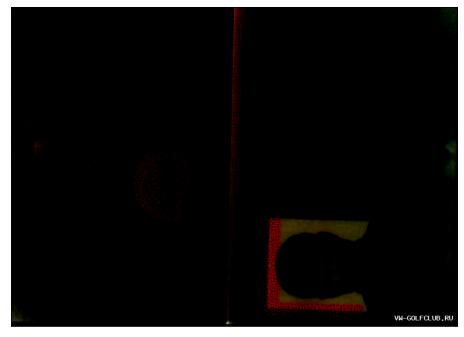

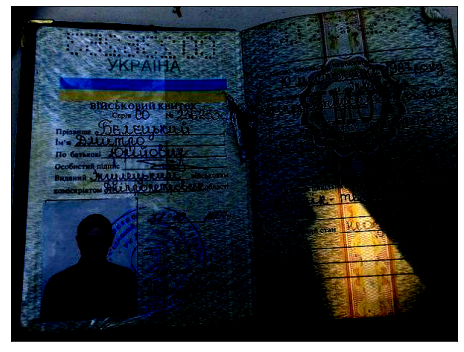

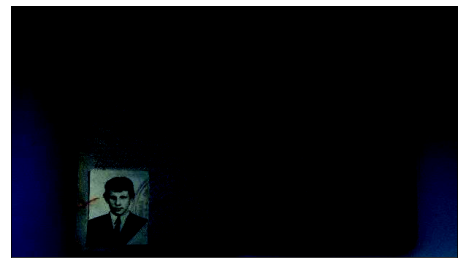

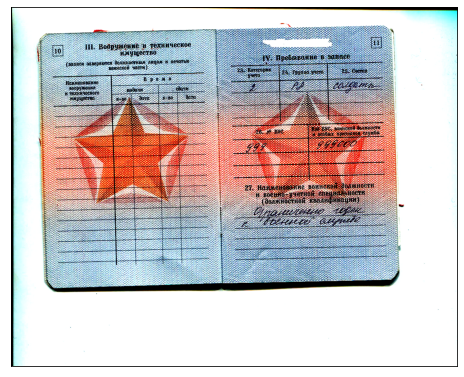

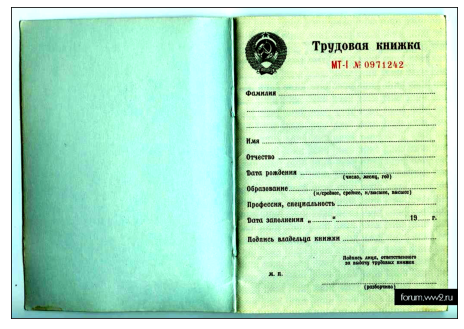

In [ ]:
acc,y_pred,y_true,sigm,sigm_voen,y_pred_voen,y_true_voen=validate_with_pics(val_loader, model,model_voen,treshold=0.65,treshold_voen=0.65,show_images_bool=False)
from sklearn.metrics import  f1_score, confusion_matrix, roc_auc_score,classification_report,precision_score,recall_score,accuracy_score
import pandas as pd
import numpy as np
print(f'F1-score is {np.round(f1_score(y_true,y_pred),4)}')
print(f'ROC-AUC score is {np.round(roc_auc_score(y_true,y_pred),4)}')
print(f'Accuracy score is {np.round(float(acc),4)}%')
print(f'Accuracy1 score is {np.round(accuracy_score(y_true,y_pred),4)}')
print(f'Precision score is {np.round(precision_score(y_true,y_pred),4)}')
print(f'Recall score is {np.round(recall_score(y_true,y_pred),4)}')
print(pd.DataFrame(confusion_matrix(y_true,y_pred)))
print(classification_report(y_true,y_pred))

In [ ]:
a=torch.randn((1,2))
torch.argmax(a).item()

0

In [ ]:
pd.DataFrame(sigm_voen)

,0,1
0,0.918641,0.081359
1,0.894841,0.105159
2,0.958547,0.041453
3,0.969023,0.030977
4,0.991669,0.008331
...,...,...
198,0.429995,0.570005
199,0.636505,0.363495
200,0.607286,0.392714
201,0.994694,0.005306


In [ ]:
torch.nn.functional.softmax(a,dim=1)

tensor([[0.6502, 0.3498]])

In [ ]:
true0_pred0_idx=np.where(np.array(y_pred)[np.where(np.array(y_true)==0)]==0)
true0_pred1_idx=np.where(np.array(y_pred)[np.where(np.array(y_true)==0)]==1)

true0_pred0_idx_voen=np.where(np.array(y_pred_voen)[np.where(np.array(y_true_voen)==0)]==0)
true0_pred1_idx_voen=np.where(np.array(y_pred_voen)[np.where(np.array(y_true_voen)==0)]==1)

In [ ]:
sigm_true0_pred0=np.array(pd.DataFrame(sigm)[0][:(np.array(y_true)==0).sum()])[true0_pred0_idx]
sigm_true0_pred1=np.array(pd.DataFrame(sigm)[0][:(np.array(y_true)==0).sum()])[true0_pred1_idx]



In [ ]:
image=next(iter(val_loader))[0].to(device)
label=next(iter(val_loader))[1].to(device)
image

In [ ]:
sigm_voen_df=pd.DataFrame(sigm_voen)
sigm_voen_df.columns=['sigm_voen','sigm']
sigm_voen_df['y_true']=y_true_voen
sigm_voen_df['y_pred']=y_pred_voen

sigm_voen_df.tail(20)

,sigm_voen,sigm,y_true,y_pred
183,0.839199,0.702713,0,0
184,0.843700,0.704487,0,0
185,0.924589,0.790706,0,0
186,0.915972,0.825161,0,0
187,0.981381,0.767372,0,0
188,0.866340,0.750525,0,0
189,0.735036,0.719270,0,0
190,0.726158,0.777256,0,0
191,0.987566,0.994576,0,0
192,0.930999,0.792304,0,0


In [ ]:
sigm_true0_pred1_voen=sigm_voen_df[(sigm_voen_df.y_true==0) & (sigm_voen_df.y_pred==1)]['sigm_voen']
sigm_true0_pred0_voen=sigm_voen_df[(sigm_voen_df.y_true==0) & (sigm_voen_df.y_pred==0)]['sigm_voen']
sigm_true0_pred0_voen_sigm=sigm_voen_df[(sigm_voen_df.y_true==0) & (sigm_voen_df.y_pred==0)]['sigm']


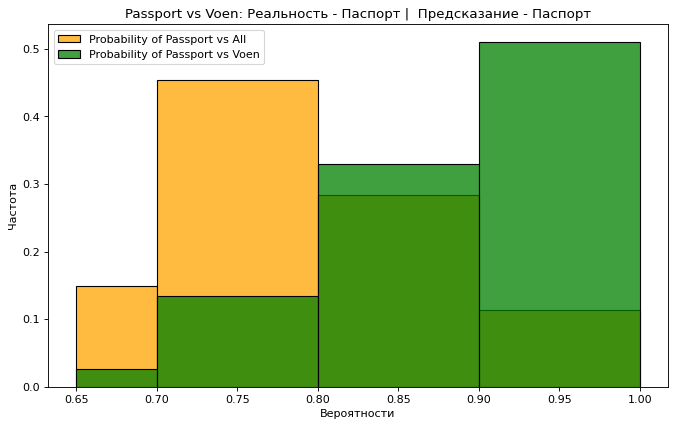

In [ ]:
import seaborn as sns
from matplotlib.pyplot import figure

figure(figsize=(10, 6), dpi=80)


sns.histplot(sigm_true0_pred0_voen_sigm, stat='probability',bins=[0.65,0.7,0.8,0.9,1],color='orange',label='Probability of Passport vs All')
sns.histplot(sigm_true0_pred0_voen, stat='probability',bins=[0.65,0.7,0.8,0.9,1],color='g',label='Probability of Passport vs Voen')
plt.legend()
plt.ylabel('Частота')
plt.xlabel('Вероятности')

plt.title('Passport vs Voen: Реальность - Паспорт |  Предсказание - Паспорт')
plt.show()


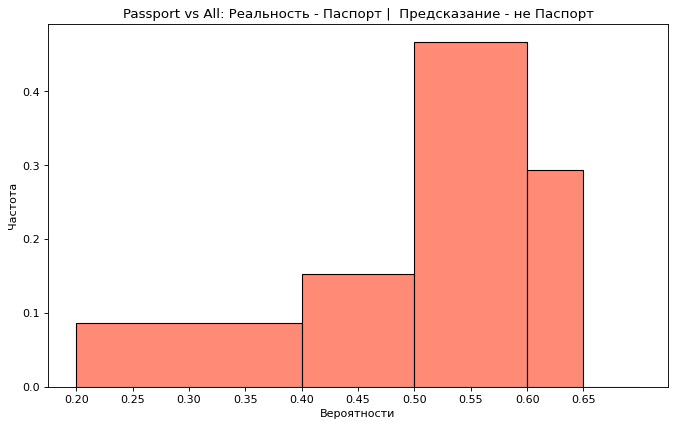

In [ ]:

import seaborn as sns

figure(figsize=(10, 6), dpi=80)
sns.histplot(sigm_true0_pred1, stat='probability',bins=[0.2,0.4,0.5,0.6,0.65,0.7],color='tomato',label='Probability of Passport vs All')

plt.xticks(np.arange(0.2,0.7,0.05))
plt.ylabel('Частота')
plt.xlabel('Вероятности')
plt.title('Passport vs All: Реальность - Паспорт |  Предсказание - не Паспорт')
plt.show()






In [ ]:
acc,y_pred,y_true,sigm,sigm_voen=validate_with_pics(test_loader, model,model_voen,treshold=0.5,treshold_voen=0.7,show_images_bool=False)
from sklearn.metrics import  f1_score, confusion_matrix, roc_auc_score,classification_report
import pandas as pd
import numpy as np
print(f'F1-score is {np.round(f1_score(y_true,y_pred),4)}')
print(f'ROC-AUC score is {np.round(roc_auc_score(y_true,y_pred),4)}')
print(f'Accuracy score is {np.round(float(acc),4)}%')
print(f'Precision score is {np.round(precision_score(y_true,y_pred),4)}')
print(f'Recall score is {np.round(recall_score(y_true,y_pred),4)}')

print(pd.DataFrame(confusion_matrix(y_true,y_pred)))
print(classification_report(y_true,y_pred))

 53%|█████▎    | 173/324 [00:39<00:13, 10.80it/s]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))
 62%|██████▏   | 200/324 [00:43<00:37,  3.31it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 324/324 [00:59<00:00,  5.43it/s]

F1-score is 0.9422
ROC-AUC score is 0.8761
Accuracy score is 91.6667%
Precision score is 0.9053
Recall score is 0.9821
    0    1
0  77   23
1   4  220
              precision    recall  f1-score   support

           0       0.95      0.77      0.85       100
           1       0.91      0.98      0.94       224

    accuracy                           0.92       324
   macro avg       0.93      0.88      0.90       324
weighted avg       0.92      0.92      0.91       324



In [ ]:
acc,y_pred,y_true,sigm,sigm_voen=validate_with_pics(test_loader, model,model_voen,treshold=0.5,treshold_voen=0.65,show_images_bool=False)
from sklearn.metrics import  f1_score, confusion_matrix, roc_auc_score,classification_report
import pandas as pd
import numpy as np
print(f'F1-score is {np.round(f1_score(y_true,y_pred),4)}')
print(f'ROC-AUC score is {np.round(roc_auc_score(y_true,y_pred),4)}')
print(f'Accuracy score is {np.round(float(acc),4)}%')
print(f'Precision score is {np.round(precision_score(y_true,y_pred),4)}')
print(f'Recall score is {np.round(recall_score(y_true,y_pred),4)}')

print(pd.DataFrame(confusion_matrix(y_true,y_pred)))
print(classification_report(y_true,y_pred))

 53%|█████▎    | 173/324 [00:39<00:13, 10.97it/s]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))
 61%|██████▏   | 199/324 [00:42<00:21,  5.78it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 324/324 [00:58<00:00,  5.56it/s]

F1-score is 0.9474
ROC-AUC score is 0.9021
Accuracy score is 92.5926%
Precision score is 0.931
Recall score is 0.9643
    0    1
0  84   16
1   8  216
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       100
           1       0.93      0.96      0.95       224

    accuracy                           0.93       324
   macro avg       0.92      0.90      0.91       324
weighted avg       0.93      0.93      0.93       324



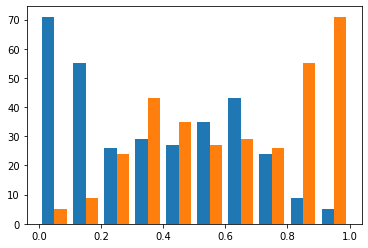

In [ ]:
sigm_сpu=np.array([sigm[i][0].detach().cpu().numpy() for i in range(len(sigm))])
plt.hist(sigm_сpu[:100])
plt.show()

In [ ]:
pd.DataFrame(sigm_сpu)

,0,1
0,0.467001,0.532999
1,0.638807,0.361193
2,0.576447,0.423553
3,0.226160,0.773840
4,0.780411,0.219589
...,...,...
319,0.323349,0.676651
320,0.516284,0.483716
321,0.514469,0.485531
322,0.250452,0.749548


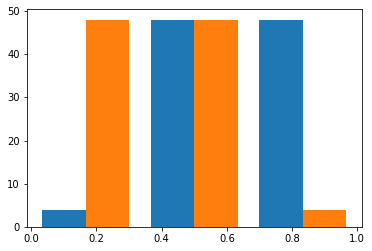

In [ ]:
plt.hist(sigm_сpu[:100],bins=3)
plt.show()

In [ ]:
tresh_list=np.arange(0.5,0.71,0.05)
tresh_list_voen=np.arange(0.5,0.71,0.05)
len(tresh_list)*len(tresh_list_voen)

25

In [ ]:
accuracies=[]
aucs=[]
recalls=[]
precisions=[]
f1_scores=[]

for tresh in tresh_list:
  for tresh_voen in tresh_list_voen:
    acc,y_pred,y_true,sigm,sigm_voen=validate_with_pics(test_loader, model,model_voen,treshold=tresh,treshold_voen=tresh_voen,show_images_bool=False)
    accuracies.append(acc)
    aucs.append(np.round(roc_auc_score(y_true,y_pred),4))
    recalls.append(np.round(recall_score(y_true,y_pred),4))
    precisions.append(np.round(precision_score(y_true,y_pred),4))
    f1_scores.append(np.round(f1_score(y_true,y_pred),4))


In [ ]:
accuracies=[]
aucs=[]
recalls=[]
precisions=[]
f1_scores=[]
k=0
for tresh in tresh_list:
  for tresh_voen in tresh_list_voen:
    acc,y_pred,y_true,sigm,sigm_voen=validate_with_pics(val_loader, model,model_voen,treshold=tresh,treshold_voen=tresh_voen,show_images_bool=False)
    accuracies.append(acc)
    aucs.append(np.round(roc_auc_score(y_true,y_pred),4))
    recalls.append(np.round(recall_score(y_true,y_pred),4))
    precisions.append(np.round(precision_score(y_true,y_pred),4))
    f1_scores.append(np.round(f1_score(y_true,y_pred),4))
    k+=1
    print(f'{k*100/25}%')

In [ ]:
tresh_comnbinations=[]
for tresh in tresh_list:
  for tresh_voen in tresh_list_voen:
    tresh_comnbinations.append('-'.join([str(np.round(tresh,2)),str(np.round(tresh_voen,2))]))

In [ ]:
result_val=pd.DataFrame(data=np.array([[np.round((accuracies_i/100),2) for accuracies_i in accuracies] ,aucs,recalls,precisions,f1_scores]).T,
                   index=tresh_comnbinations,
                   columns=['Accuracy','ROC-AUC','Recall','Precision','F1_score'])

In [ ]:
result_val.sort_values(by='Accuracy',ascending=False).head(10)

,Accuracy,ROC-AUC,Recall,Precision,F1_score
0.5-0.65,0.94,0.9284,0.9543,0.9510,0.9526
0.5-0.5,0.93,0.9318,0.9402,0.9605,0.9503
0.5-0.55,0.93,0.9283,0.9402,0.9571,0.9486
0.5-0.6,0.93,0.9292,0.9455,0.9556,0.9505
0.5-0.7,0.92,0.9058,0.9613,0.9271,0.9439
0.55-0.5,0.92,0.8988,0.9578,0.9222,0.9397
0.55-0.55,0.92,0.8953,0.9578,0.9191,0.9380
0.55-0.6,0.92,0.8962,0.9596,0.9192,0.9390
0.55-0.65,0.92,0.8997,0.9666,0.9197,0.9426
0.6-0.65,0.91,0.8745,0.9789,0.8941,0.9346


In [ ]:
result_val.sort_values(by='ROC-AUC',ascending=False).head(10)

,Accuracy,ROC-AUC,Recall,Precision,F1_score
0.5-0.5,0.93,0.9318,0.9402,0.9605,0.9503
0.5-0.6,0.93,0.9292,0.9455,0.9556,0.9505
0.5-0.65,0.94,0.9284,0.9543,0.9510,0.9526
0.5-0.55,0.93,0.9283,0.9402,0.9571,0.9486
0.5-0.7,0.92,0.9058,0.9613,0.9271,0.9439
0.55-0.65,0.92,0.8997,0.9666,0.9197,0.9426
0.55-0.5,0.92,0.8988,0.9578,0.9222,0.9397
0.55-0.6,0.92,0.8962,0.9596,0.9192,0.9390
0.55-0.55,0.92,0.8953,0.9578,0.9191,0.9380
0.55-0.7,0.91,0.8866,0.9719,0.9066,0.9381


In [ ]:
result_val.sort_values(by='Recall',ascending=False).head(10)

,Accuracy,ROC-AUC,Recall,Precision,F1_score
0.7-0.7,0.85,0.7822,0.9930,0.8212,0.8990
0.7-0.65,0.85,0.7839,0.9930,0.8224,0.8997
0.65-0.7,0.88,0.8258,0.9930,0.8522,0.9172
0.65-0.65,0.89,0.8345,0.9930,0.8587,0.9209
0.7-0.6,0.85,0.7831,0.9912,0.8222,0.8988
0.7-0.55,0.85,0.7831,0.9912,0.8222,0.8988
0.7-0.5,0.85,0.7848,0.9912,0.8234,0.8995
0.65-0.6,0.88,0.8327,0.9895,0.8582,0.9192
0.65-0.55,0.88,0.8327,0.9895,0.8582,0.9192
0.65-0.5,0.89,0.8344,0.9895,0.8595,0.9199


In [ ]:
result_val.sort_values(by='Precision',ascending=False).head(10)

,Accuracy,ROC-AUC,Recall,Precision,F1_score
0.5-0.5,0.93,0.9318,0.9402,0.9605,0.9503
0.5-0.55,0.93,0.9283,0.9402,0.9571,0.9486
0.5-0.6,0.93,0.9292,0.9455,0.9556,0.9505
0.5-0.65,0.94,0.9284,0.9543,0.9510,0.9526
0.5-0.7,0.92,0.9058,0.9613,0.9271,0.9439
0.55-0.5,0.92,0.8988,0.9578,0.9222,0.9397
0.55-0.65,0.92,0.8997,0.9666,0.9197,0.9426
0.55-0.6,0.92,0.8962,0.9596,0.9192,0.9390
0.55-0.55,0.92,0.8953,0.9578,0.9191,0.9380
0.55-0.7,0.91,0.8866,0.9719,0.9066,0.9381


In [ ]:
result_val.sort_values(by='F1_score',ascending=False).head(10)

,Accuracy,ROC-AUC,Recall,Precision,F1_score
0.5-0.65,0.94,0.9284,0.9543,0.9510,0.9526
0.5-0.6,0.93,0.9292,0.9455,0.9556,0.9505
0.5-0.5,0.93,0.9318,0.9402,0.9605,0.9503
0.5-0.55,0.93,0.9283,0.9402,0.9571,0.9486
0.5-0.7,0.92,0.9058,0.9613,0.9271,0.9439
0.55-0.65,0.92,0.8997,0.9666,0.9197,0.9426
0.55-0.5,0.92,0.8988,0.9578,0.9222,0.9397
0.55-0.6,0.92,0.8962,0.9596,0.9192,0.9390
0.55-0.7,0.91,0.8866,0.9719,0.9066,0.9381
0.55-0.55,0.92,0.8953,0.9578,0.9191,0.9380
